<div align="center">
  <h1 align="center">Figure 3: Heterogeneity within datasets</h1>
  <p align="center"><i>Marie E Galteau, 2023</i></p>

  <table align="cener">
    <tr>
    <td><img align="right" src="https://open-neuroscience.com/post/nilearn/featured.png" alt="image" width="150" /></td>
    <td><img align="right" src="https://d33wubrfki0l68.cloudfront.net/e33fd6f372aa5d51e7b0de4bd763bd983251881e/4b0f4/blog/customising-matplotlib/matplot_title_logo.png" alt="image" width="200" /></td>
    </tr>
  </table>
</div>


---

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import nibabel as nib
from numpy import savetxt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nilearn import plotting, image
from nilearn.plotting import plot_img
import matplotlib.gridspec as gridspec
from nilearn.maskers import NiftiMasker

In [42]:
# Init var

hrf_path = 'glover'
    # glover
    # spm
    # Two_gammas
    # Peak_span
    
analysis_folder = '/project/4180000.19/multirat_stim/scratch/rabies_test/'
z_scores_path = analysis_folder+f'first_level/{hrf_path}/z_score/'

metadata_path ='/home/traaffneu/margal/code/multirat_se/script/table/metadata_stand.tsv'
df = pd.read_csv(metadata_path, sep='\t')
df = df.loc[(df['exclude'] != 'yes')]

template_folder = '/groupshare/traaffneu/preclinimg/templates/'
template = nib.load('/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template_Masked.nii')
atlas_mask = nib.load(template_folder+'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Mask.nii')
masker = NiftiMasker(mask_img=atlas_mask, standardize=True)

#anat_template_path = '/project/4180000.19/multirat_stim/rabies/preprocess/sub-0201002_ses-1/anat_datasink/anat_preproc/_scan_info_subject_id0201000.session1_split_name_sub-0201002_ses-1_crop_T2w/sub-0201002_ses-1_crop-orient_T2w_RAS_inho_cor.nii.gz'
#anat_template =nib.load(anat_template_path)
                                                                                                                                                                                                                                

200300


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


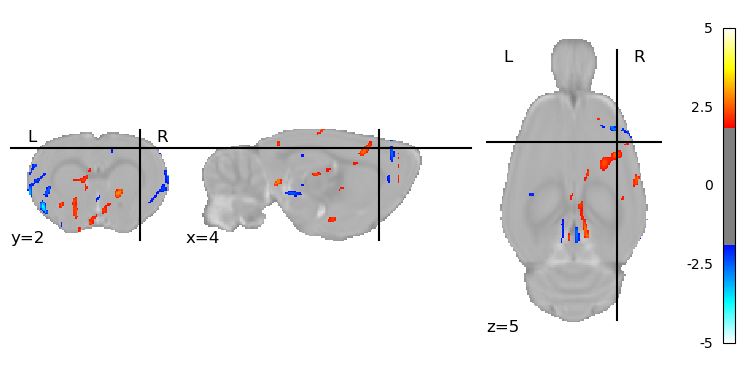

200301


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


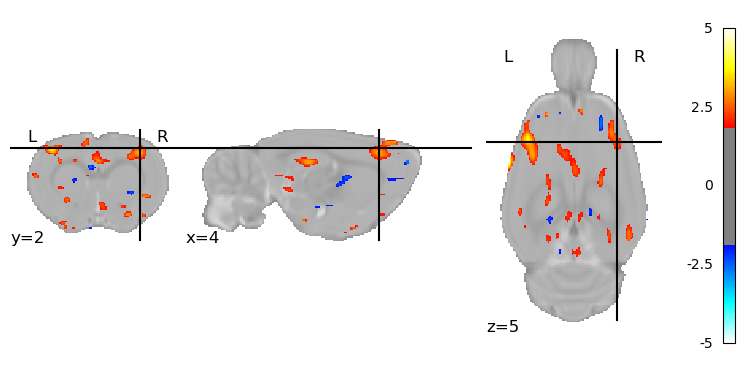

200302


/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn(


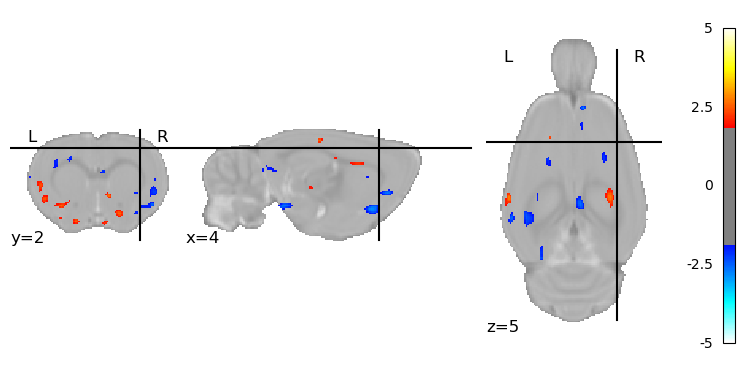

In [43]:
# --- with nifti masker --- 

for index in range(19, 22):

    subj_num=str(df.iloc[index]['rat.sub']) #[:-2]
    ses=str(df.iloc[index]['rat.ses'])    
    #print(ses)
    print(subj_num)

    z_scores = nib.load(z_scores_path+f'z_score_sub-0{subj_num}_ses-{ses}.nii.gz')
    z_scores = masker.fit_transform(z_scores)                                 
        
    plot_stat = plotting.plot_stat_map(masker.inverse_transform(z_scores),
                                       bg_img=template,
                                       cut_coords=(4, 2, 5),  #forepaw=(4, 2, 5), hind = (3, 0, 5), visual(0, -7, 4)
                                       threshold=1.9,
                                       display_mode='ortho',
                                       cbar_tick_format='%.2g',
                                       symmetric_cbar=True,
                                       draw_cross=True,
                                       vmax=5,
                                       black_bg=False)
                                       #cmap=my_colors)     # For customed color scale
                                       
    plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/individual_levels/{hrf_path}/sub-0{subj_num}_z_scores_first-level.svg', format='svg', dpi=1200)
    #plt.savefig(f'/project/4180000.19/multirat_stim/scratch/plots/fig2_hetero/sub-0{subj_num}_z_scores_first-level.svg', format='svg', dpi=1200)
    plt.show()

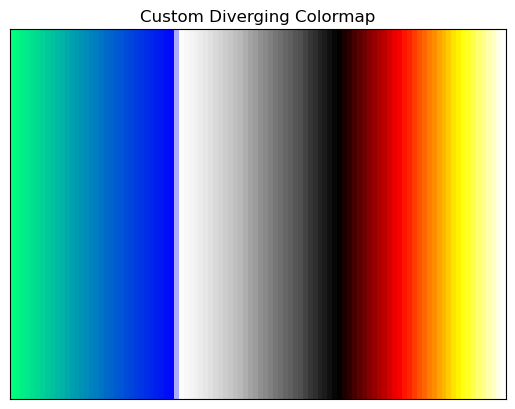

In [6]:
#If want to make custom color scale

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define colors for the lower and upper ranges
color_upper = plt.cm.hot(np.linspace(0., 1, 128))
color_middle = plt.cm.Greys(np.linspace(0., 1, 128))
color_lower = plt.cm.winter_r(np.linspace(0., 1, 128))

# Combine colors
colors = np.vstack((color_lower,color_middle, color_upper))

# Create a LinearSegmentedColormap from the combined colors
my_colors = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors)

# Plot the colormap
plt.imshow(np.linspace(-1, 1, 100).reshape(1, -1), cmap=my_colors, aspect='auto')
plt.xticks([])  # Hide x ticks
plt.yticks([])  # Hide y ticks
plt.title('Custom Diverging Colormap')
plt.show()


96
201101


/tmp/ipykernel_12658/973733235.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, nmaps + 1, index + 1)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/nilearn/plotting/displays/_slicers.py:162: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure(figure, figsize=figsize, facecolor=facecolor)


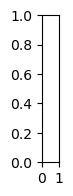

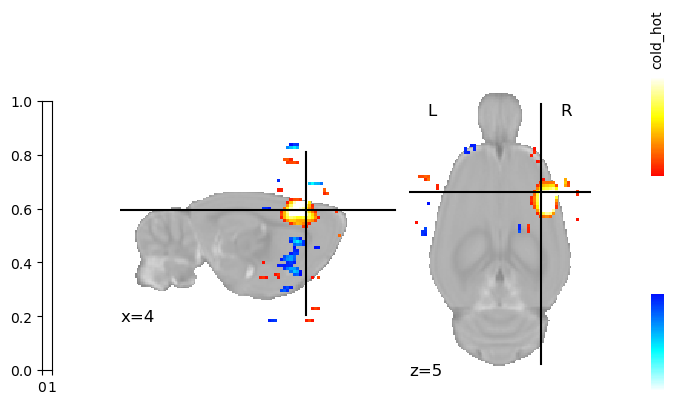

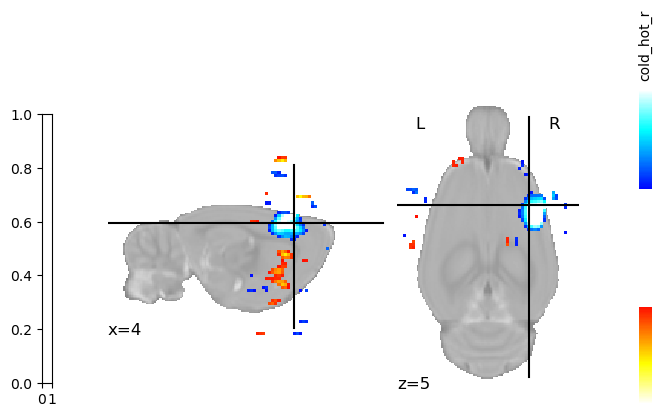

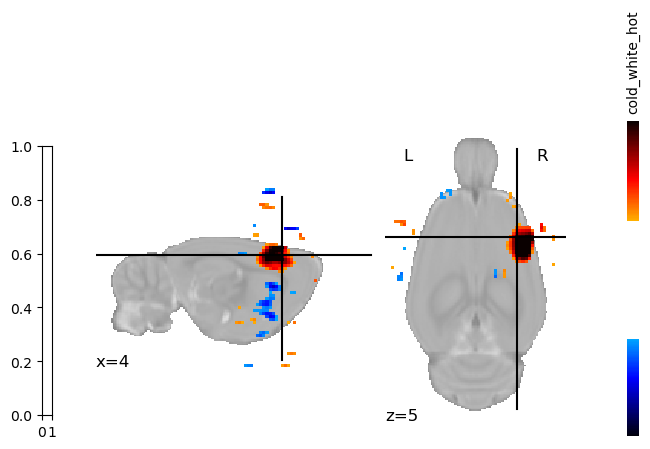

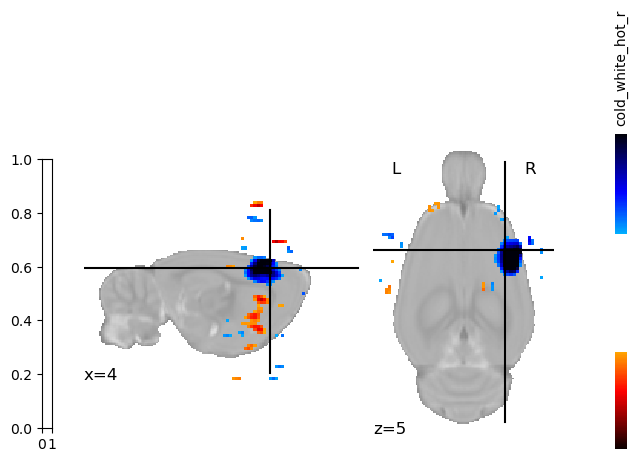

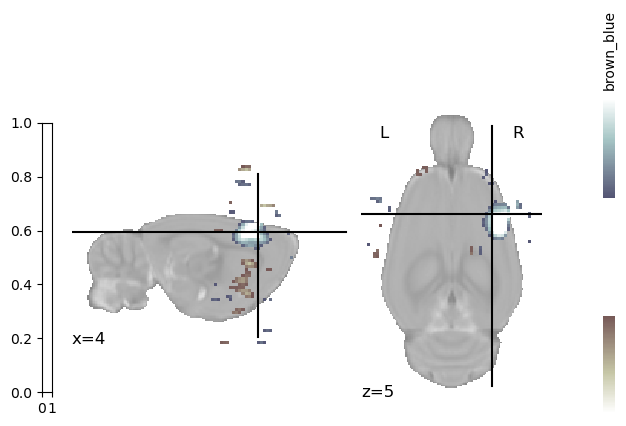

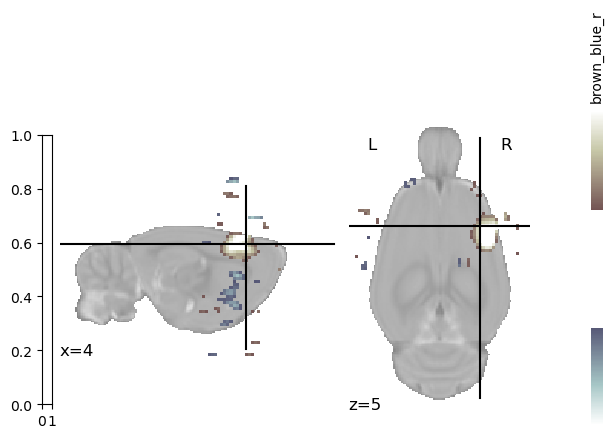

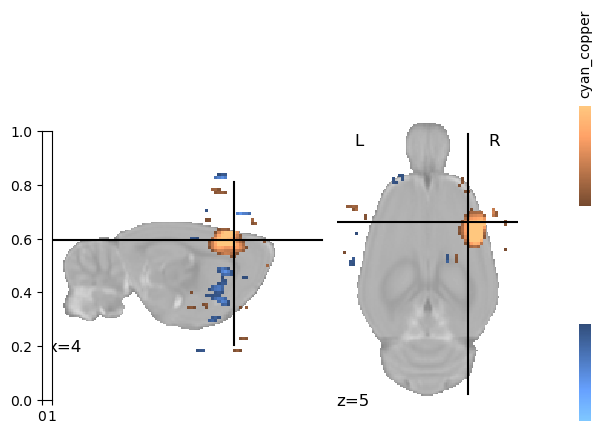

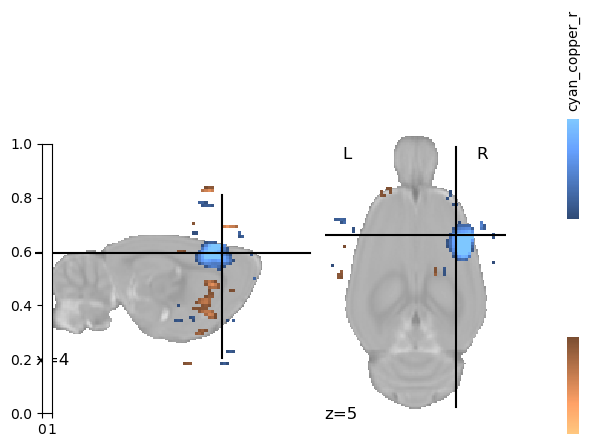

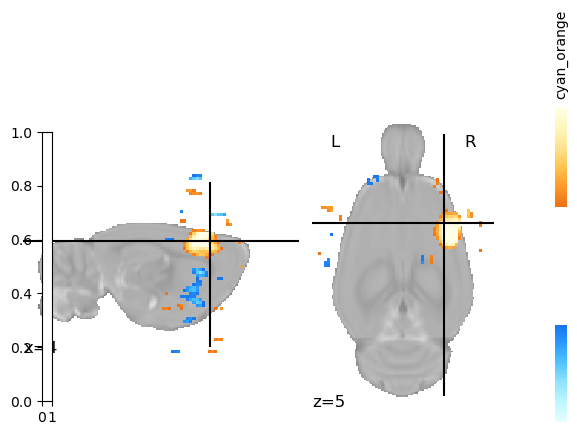

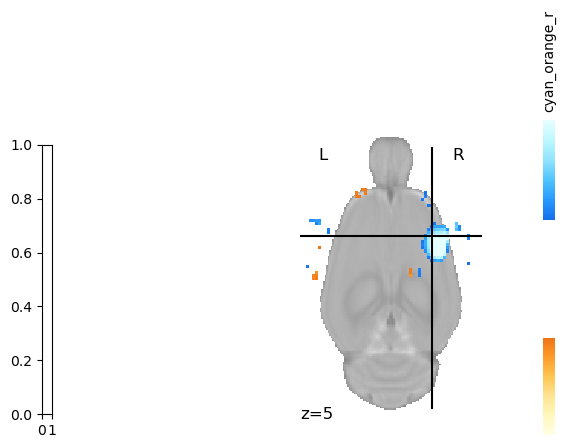

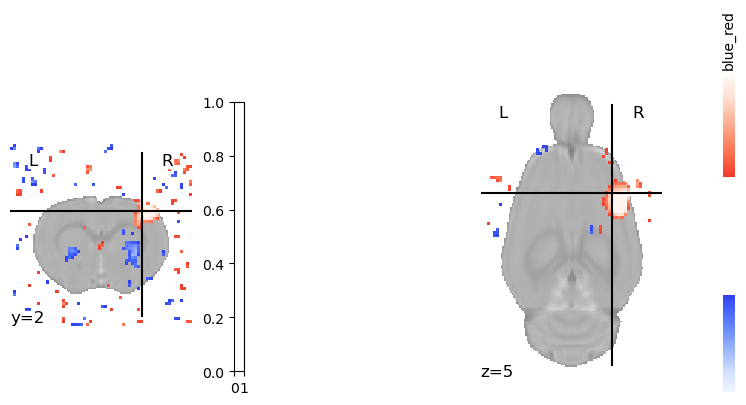

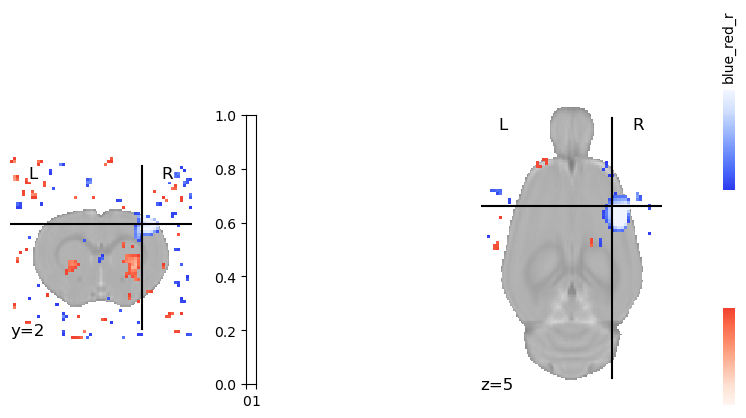

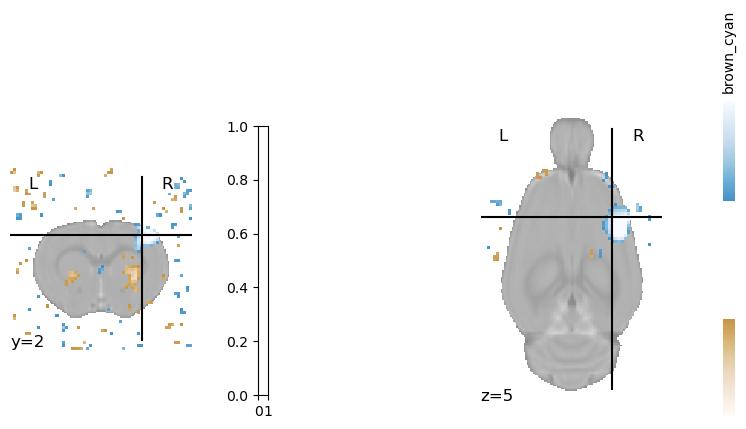

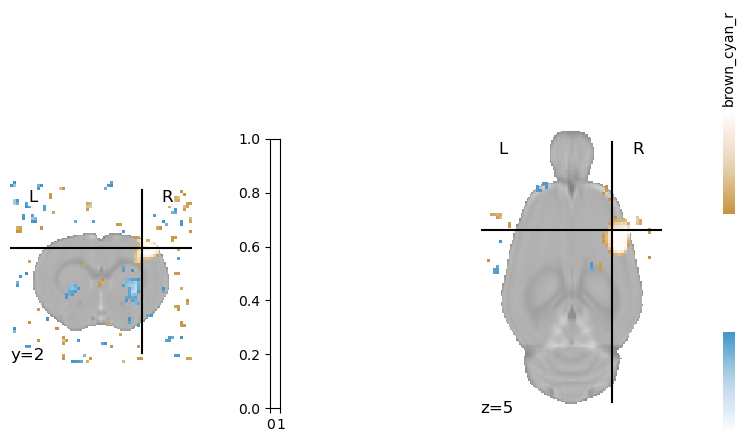

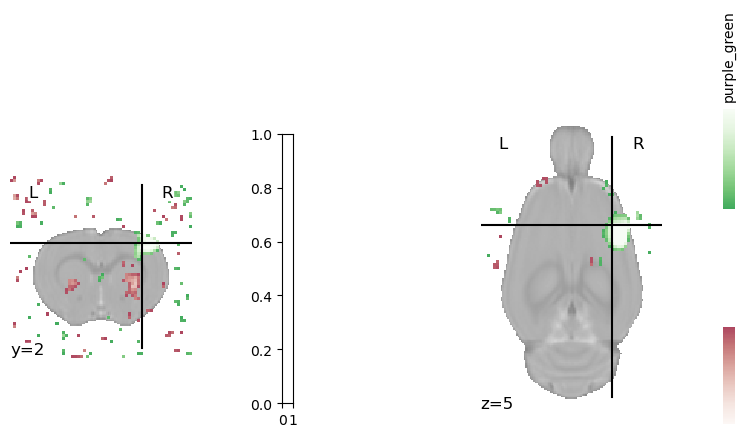

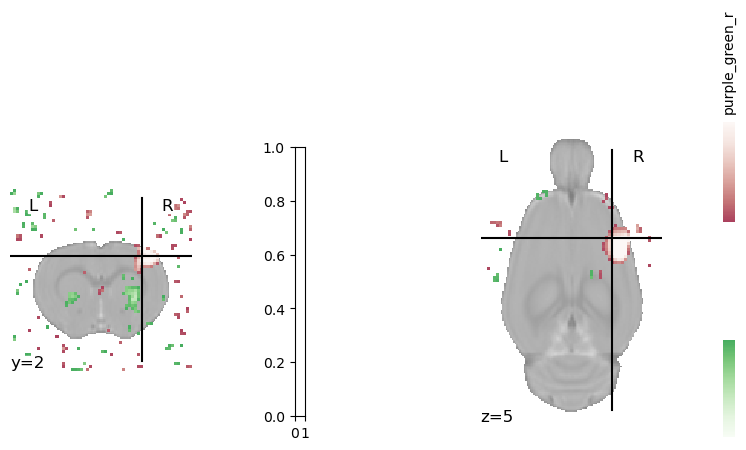

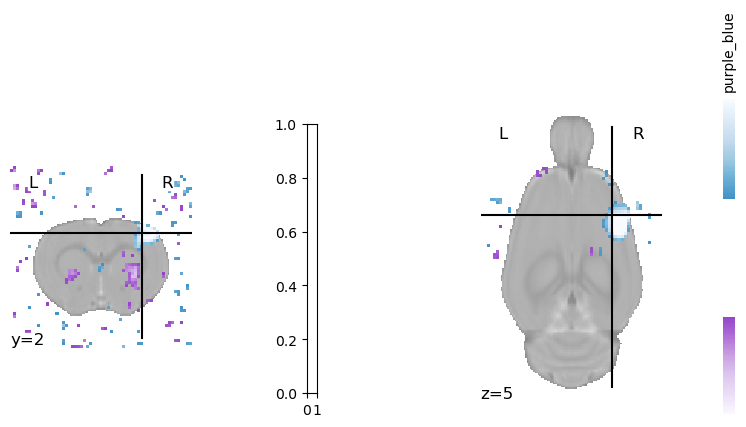

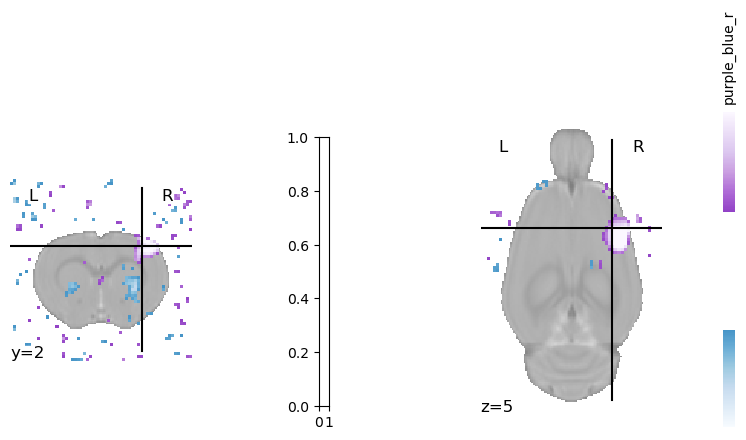

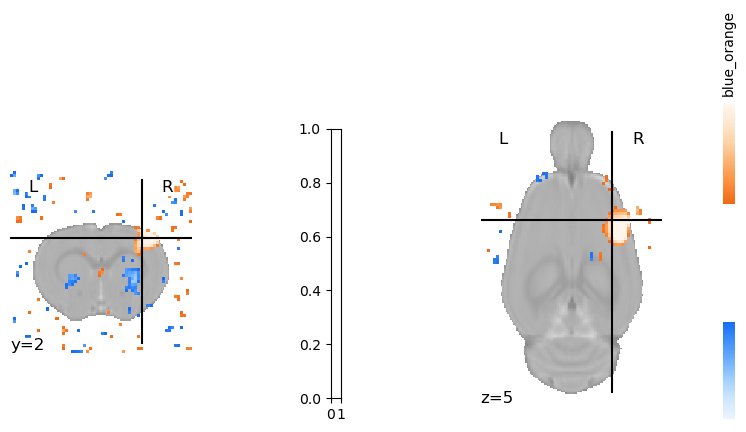

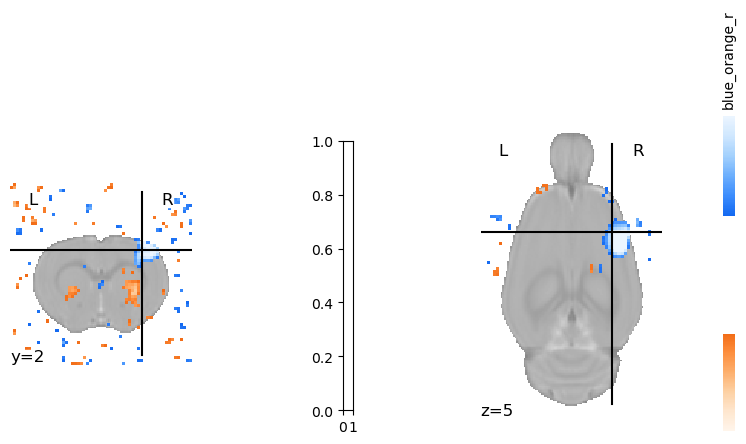

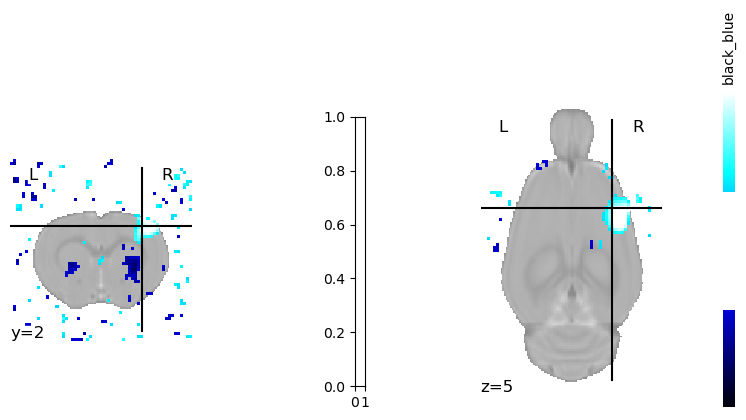

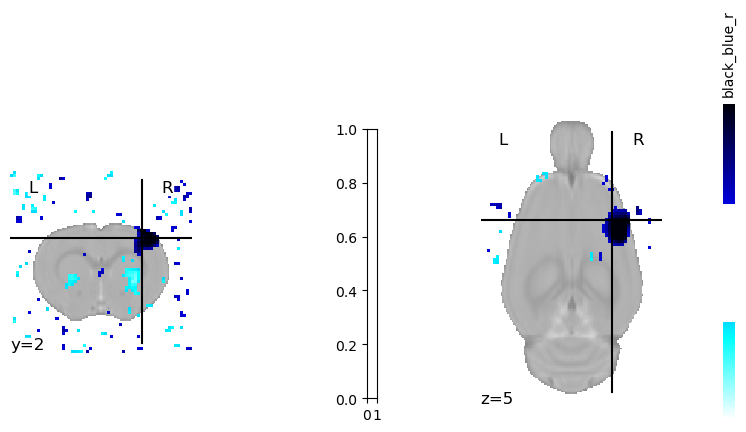

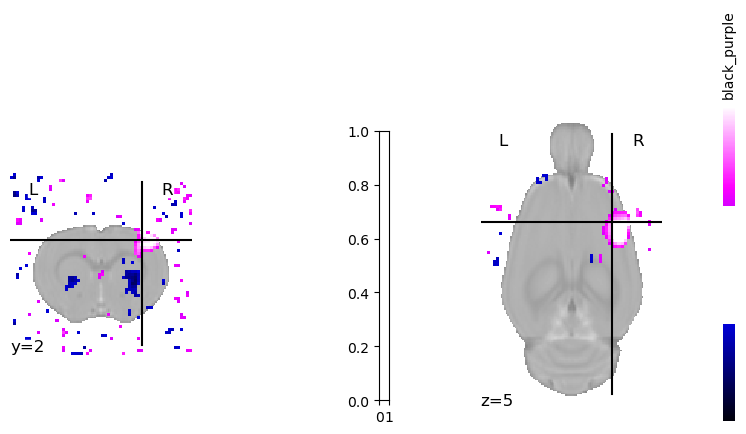

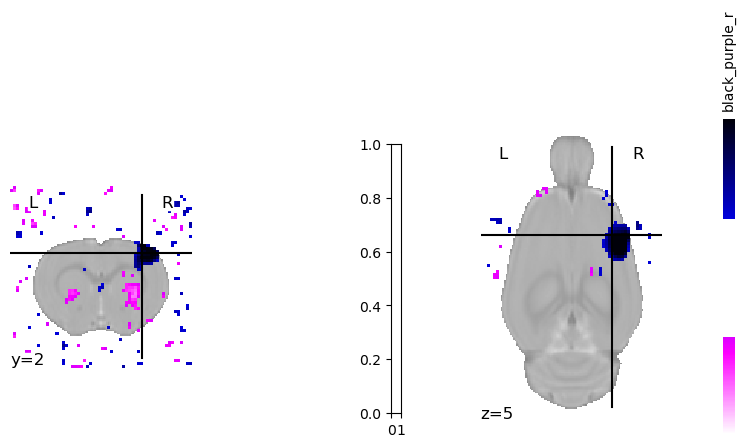

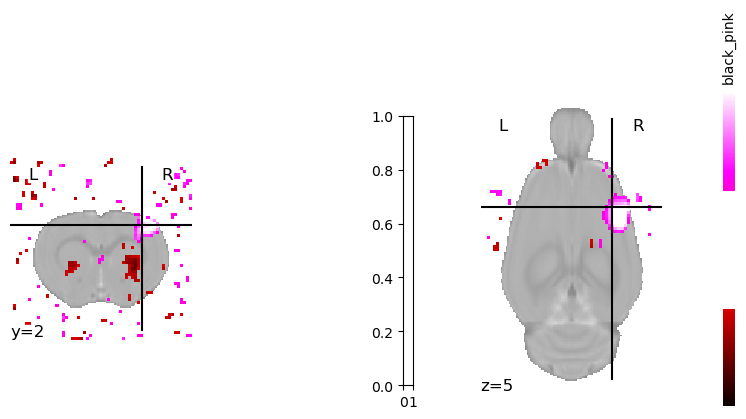

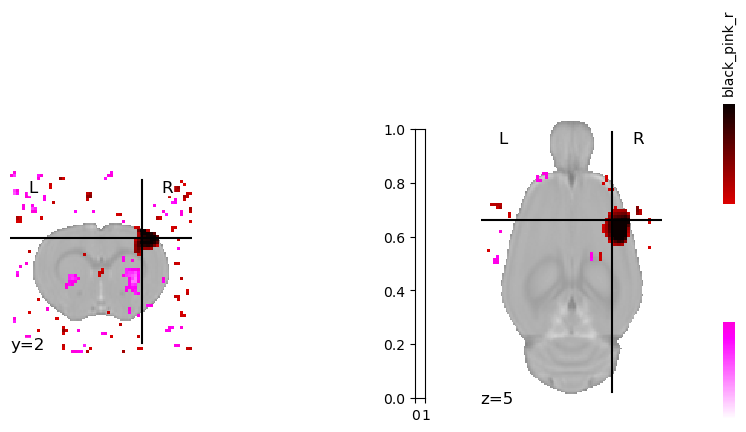

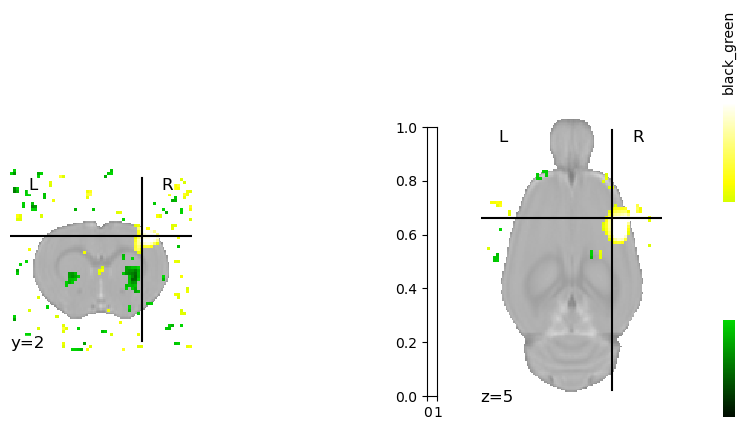

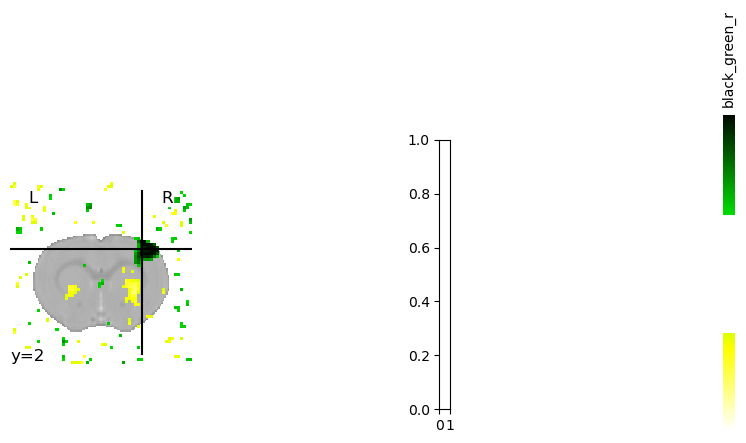

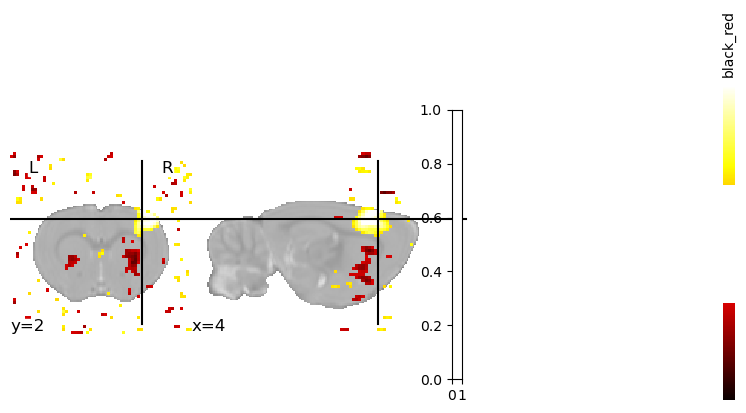

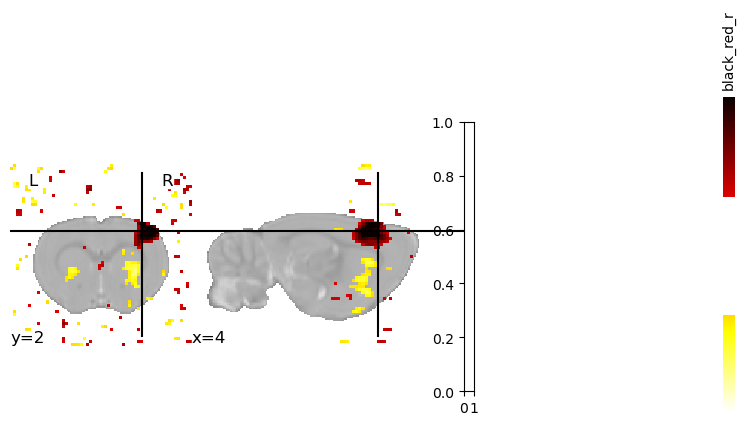

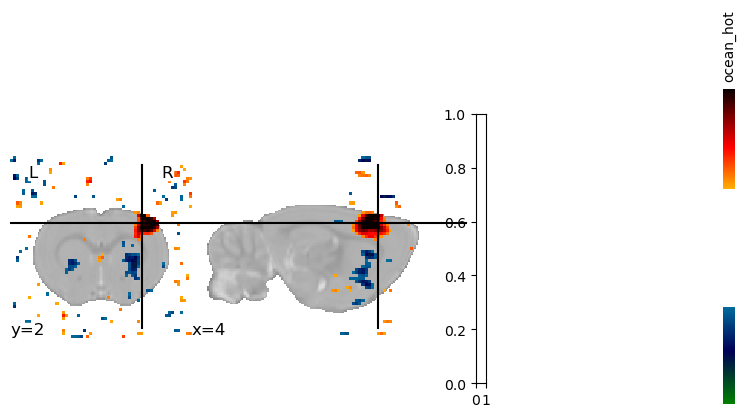

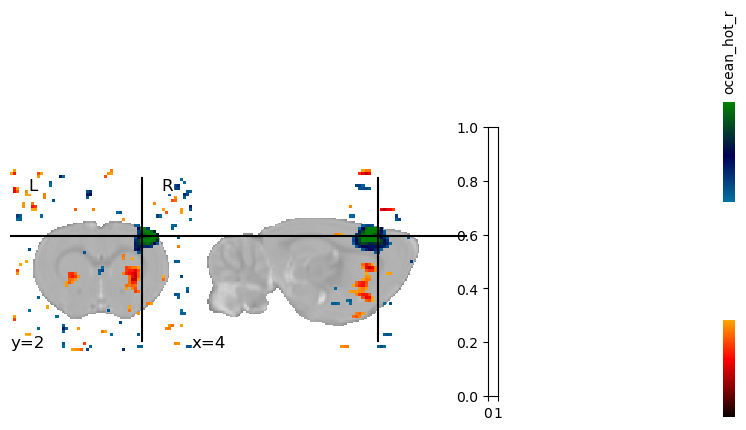

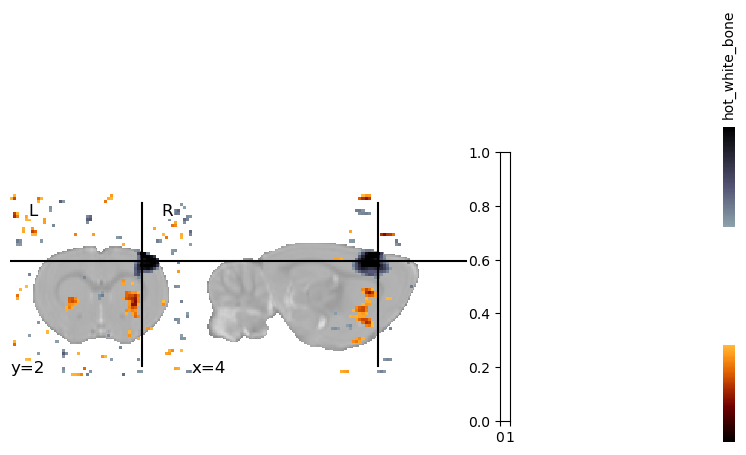

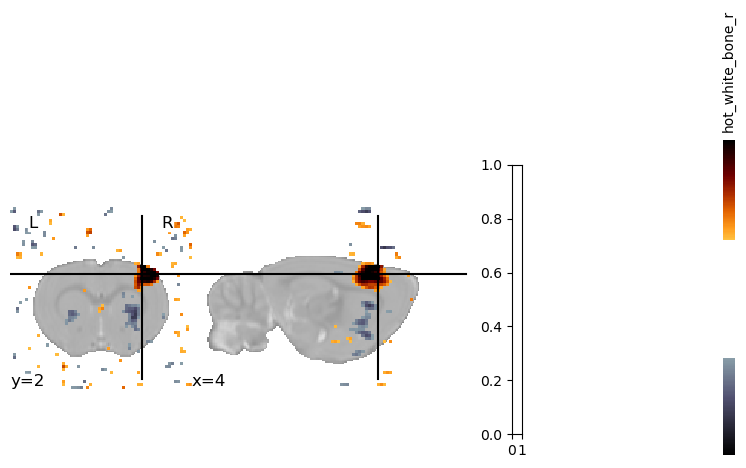

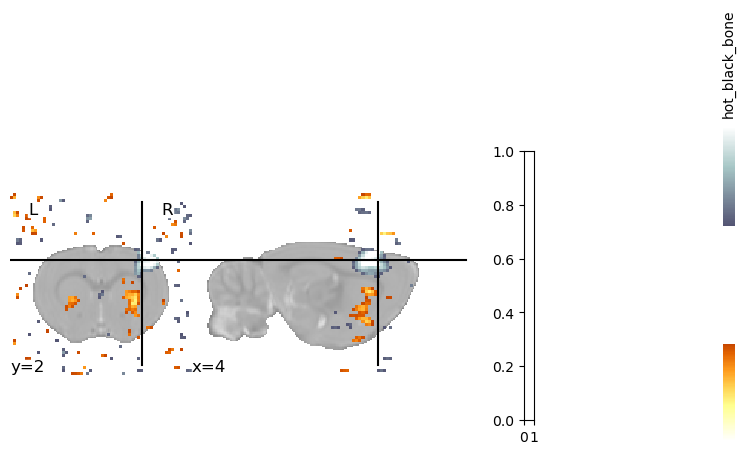

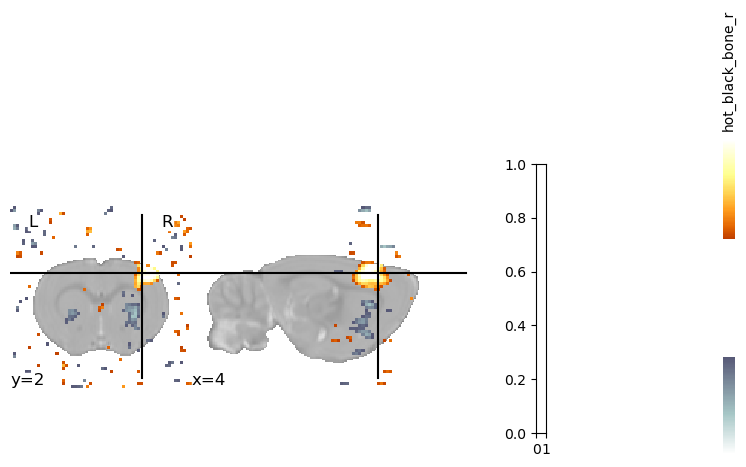

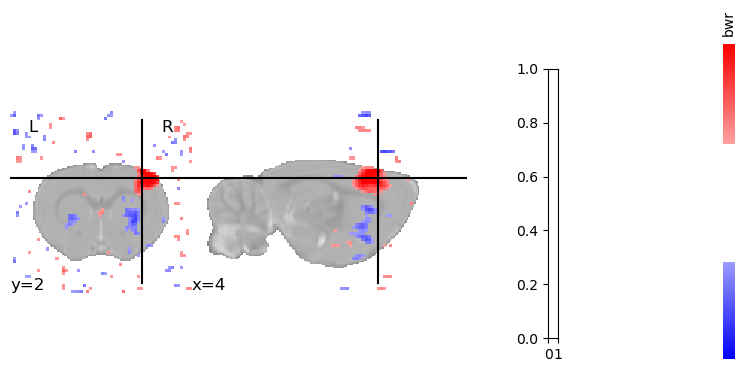

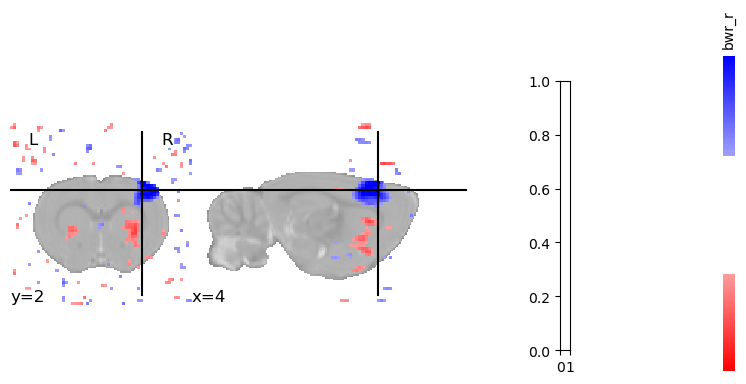

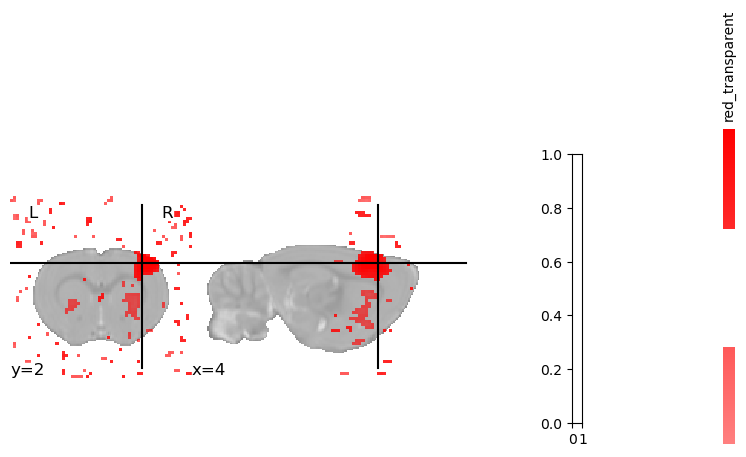

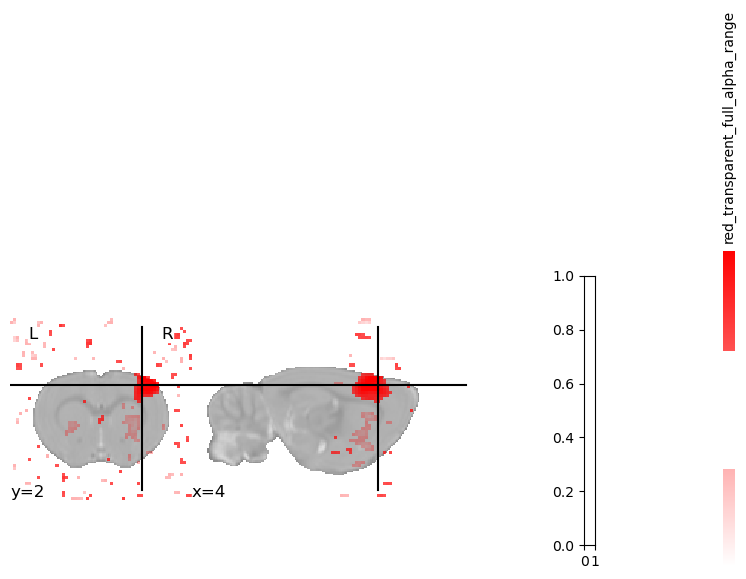

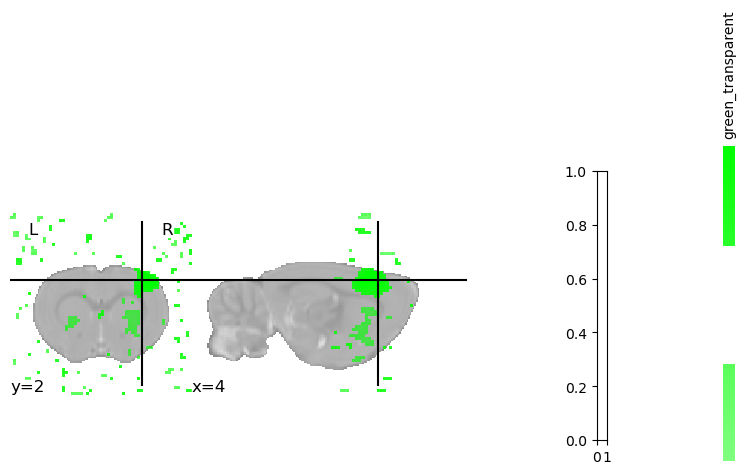

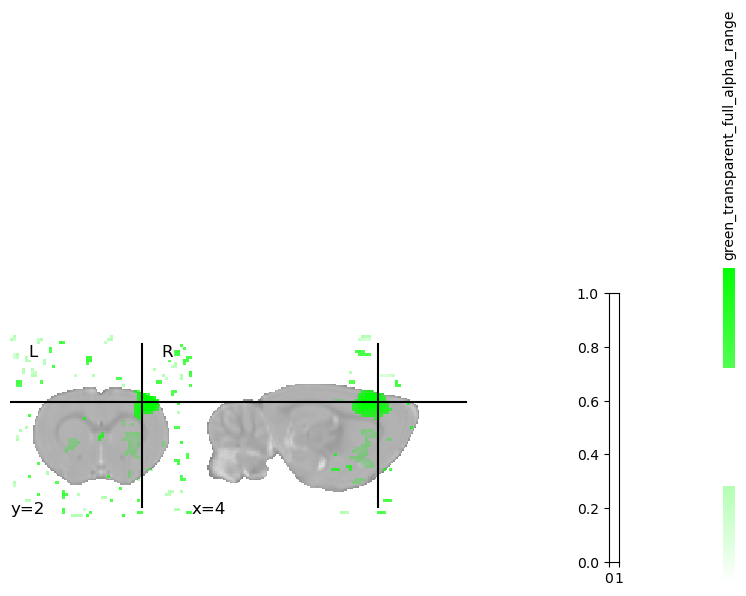

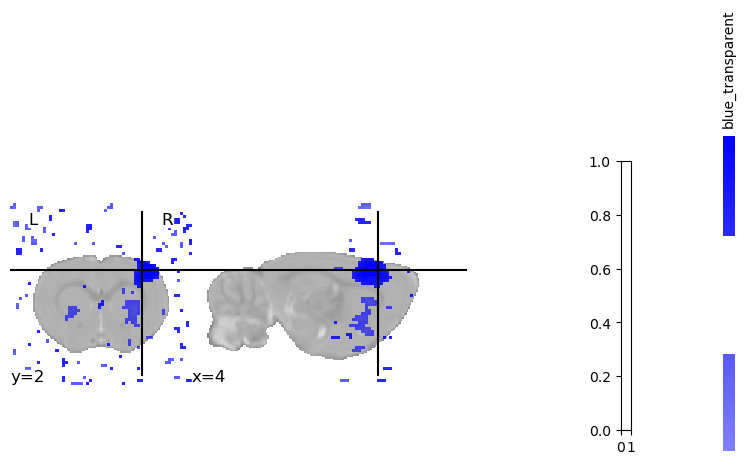

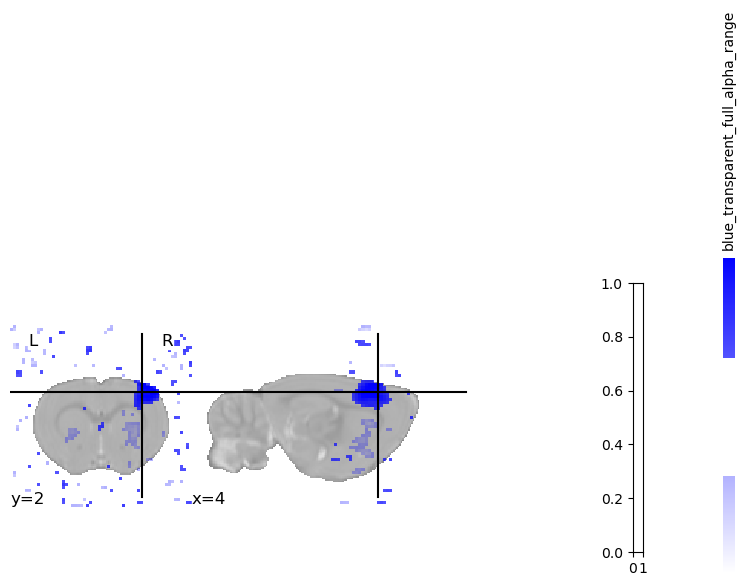

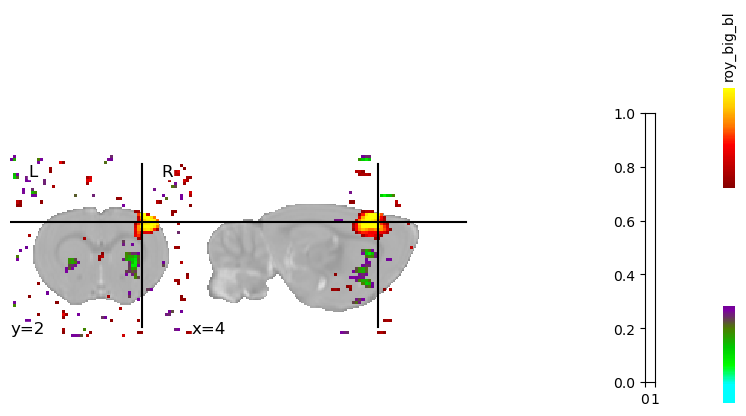

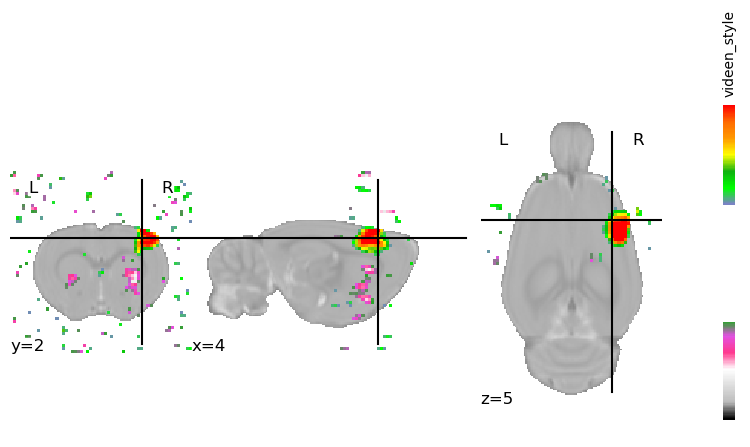

97
201102


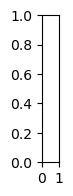

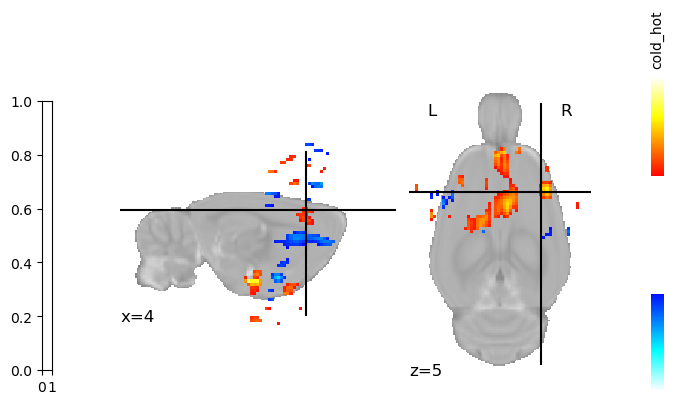

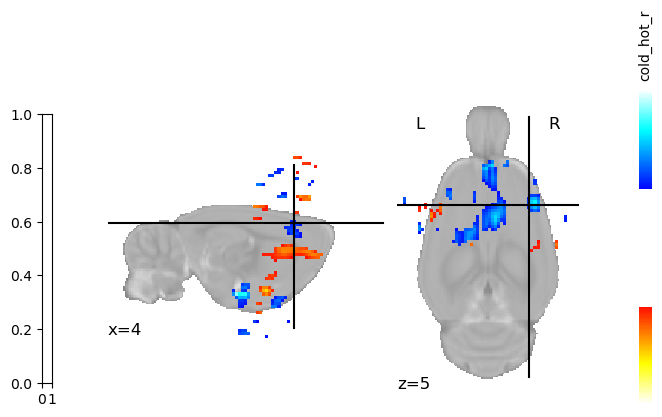

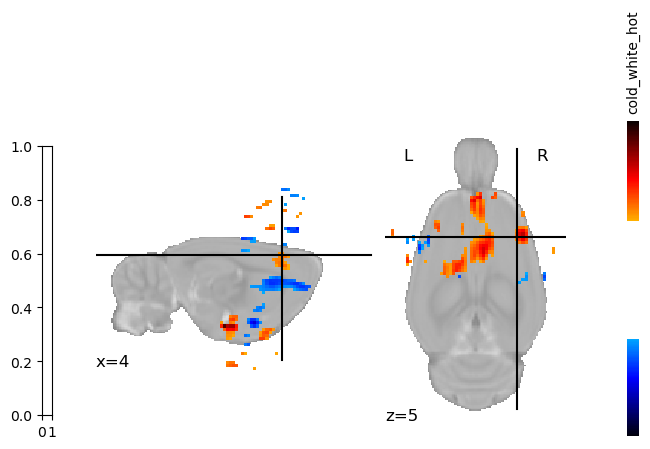

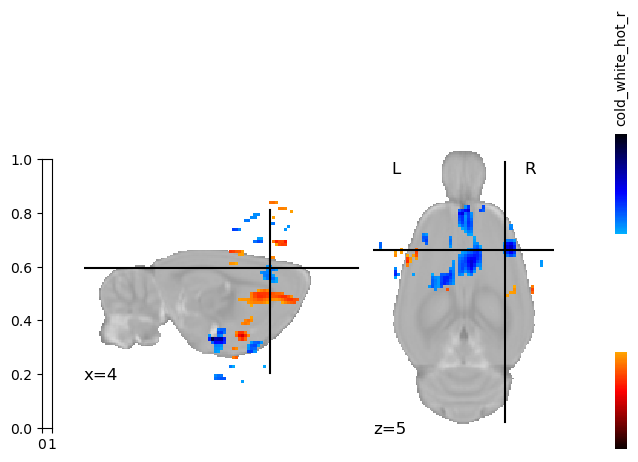

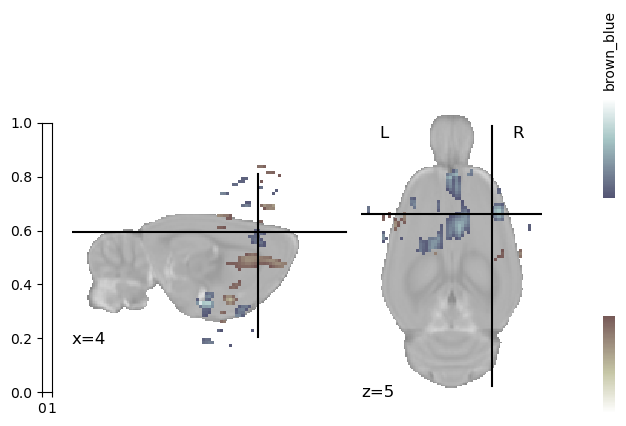

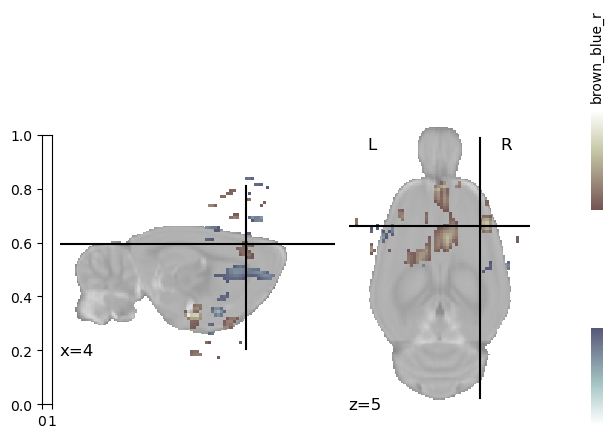

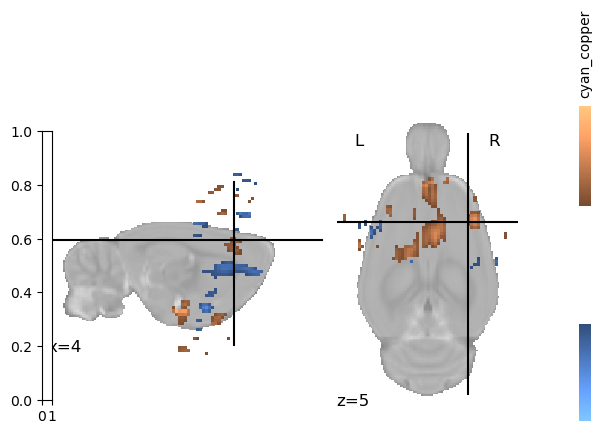

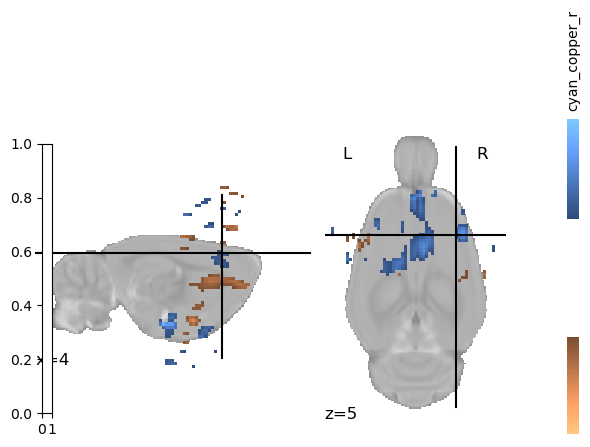

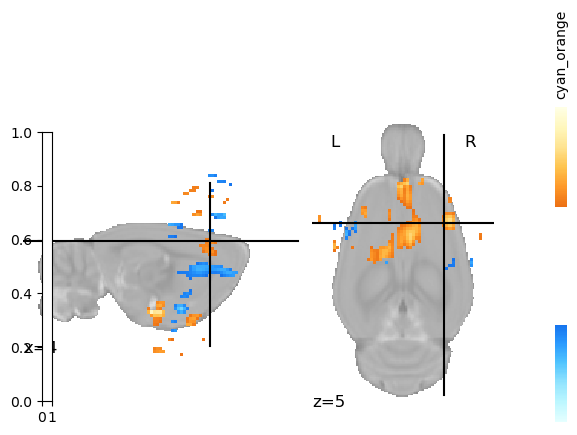

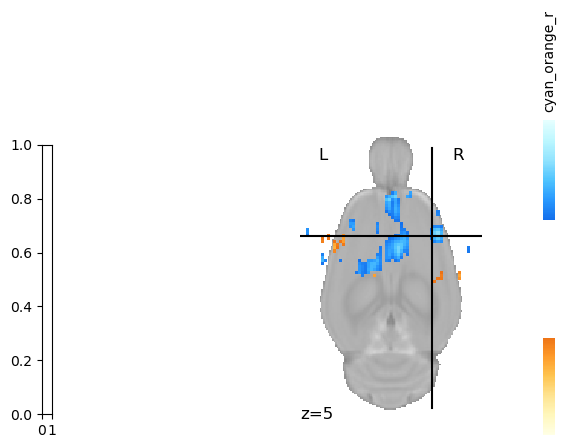

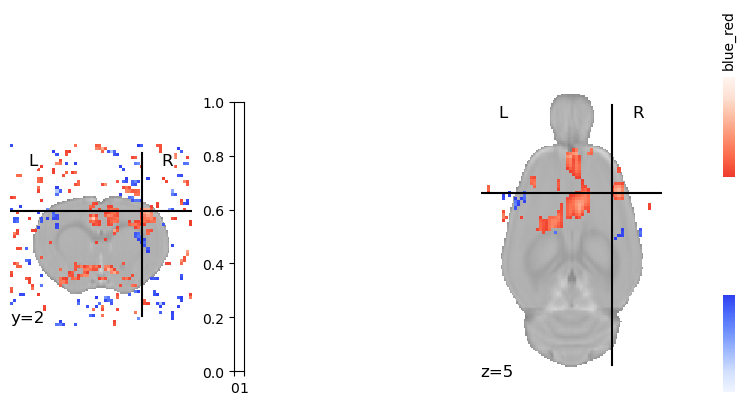

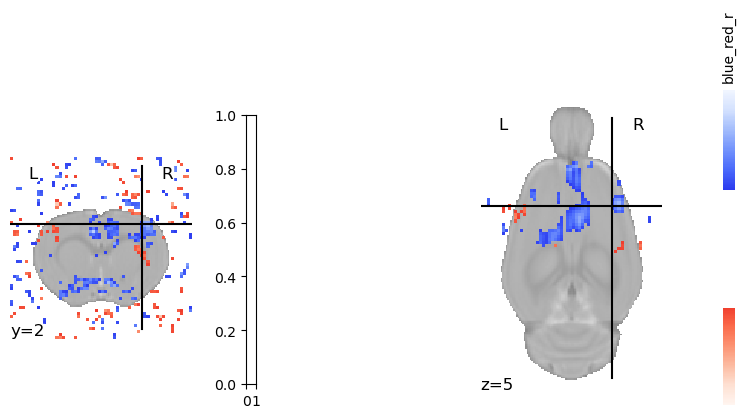

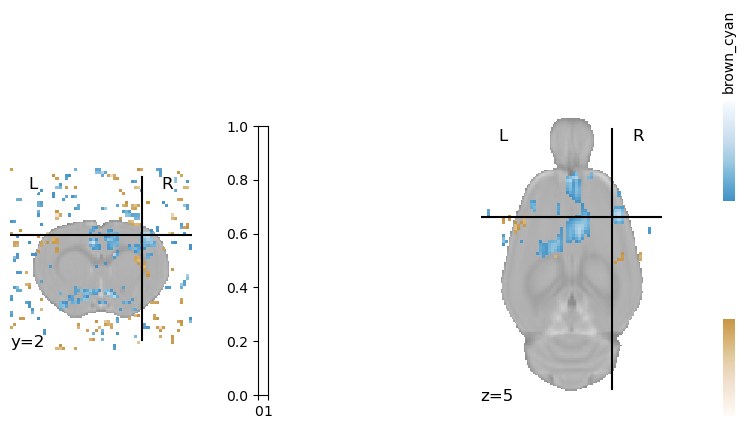

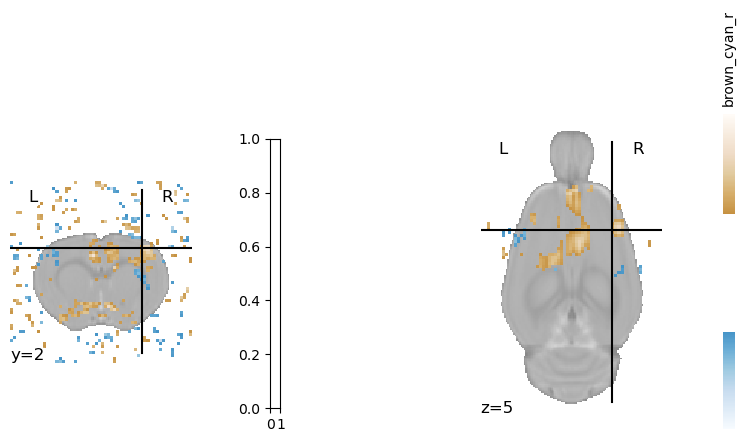

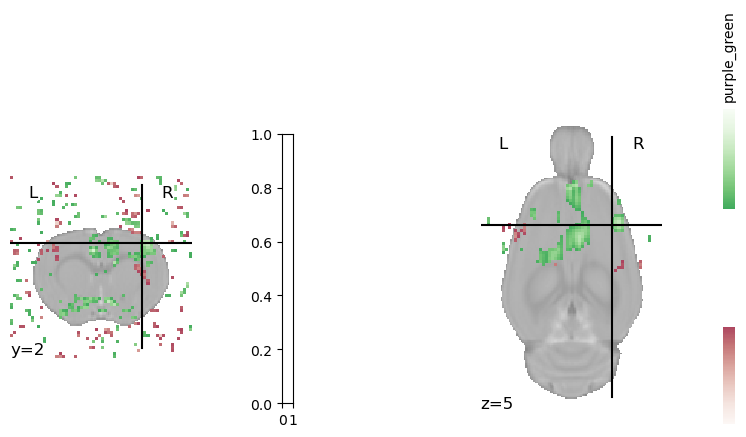

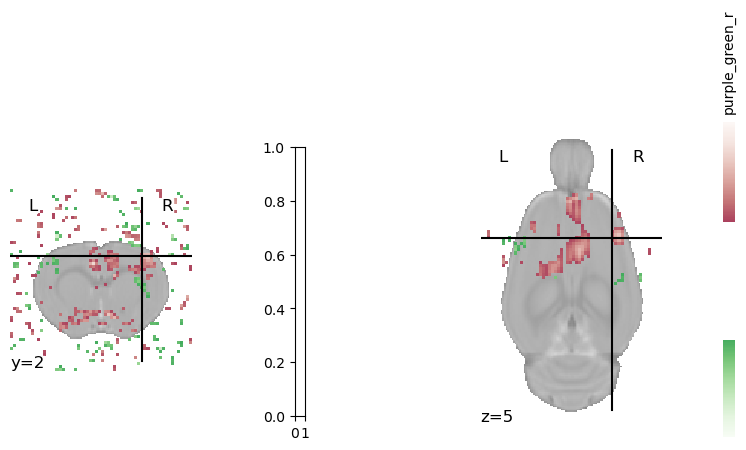

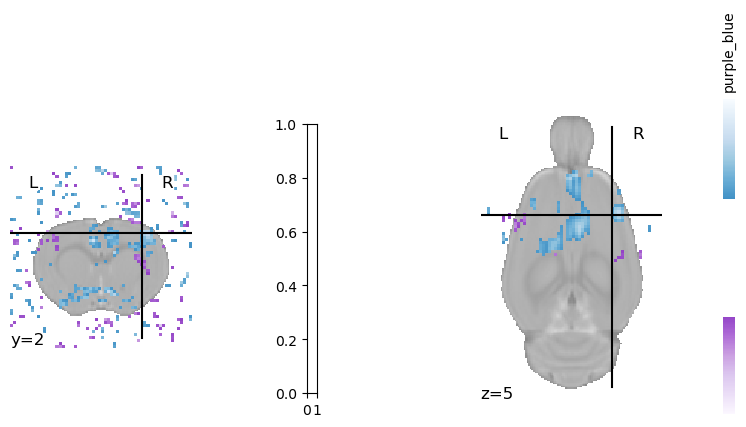

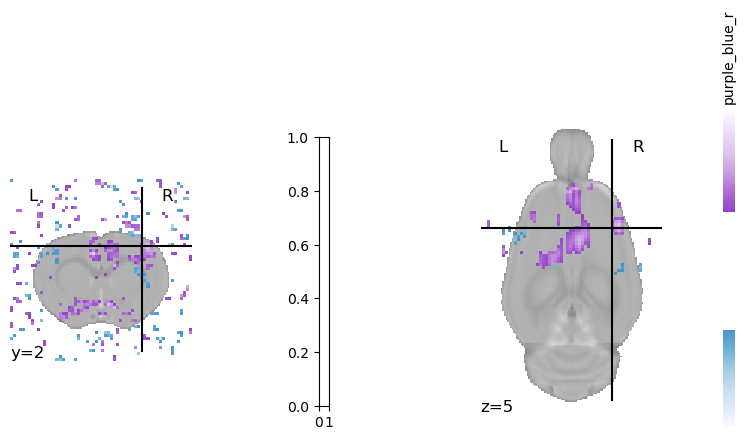

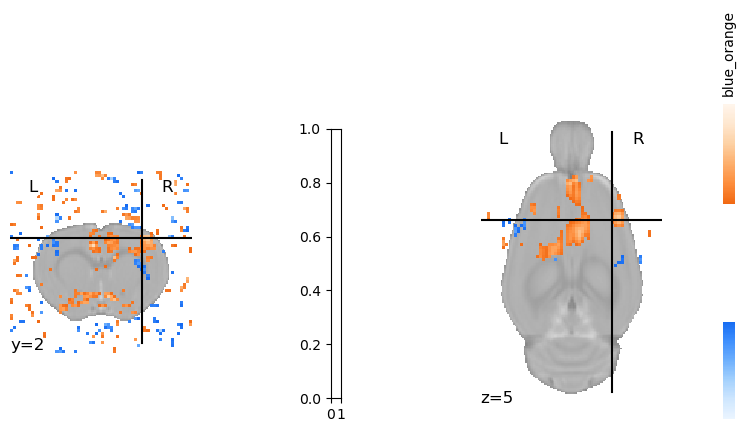

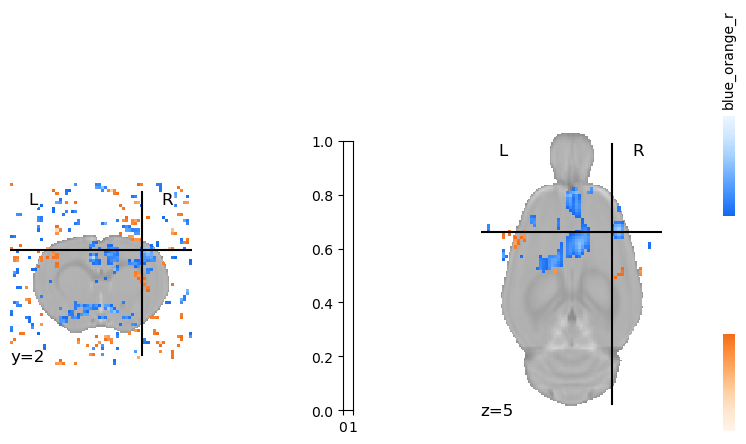

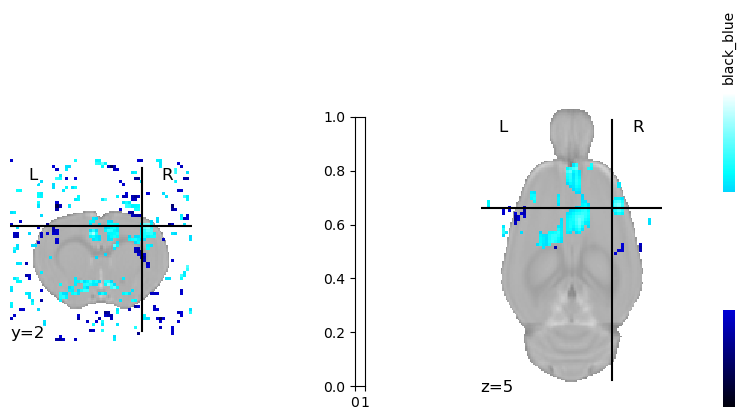

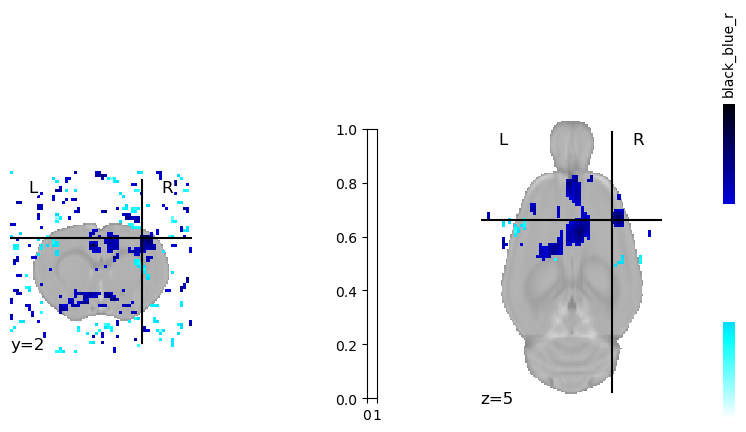

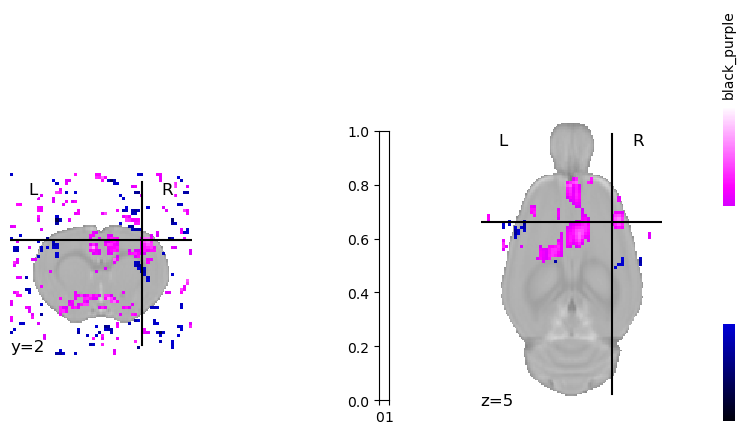

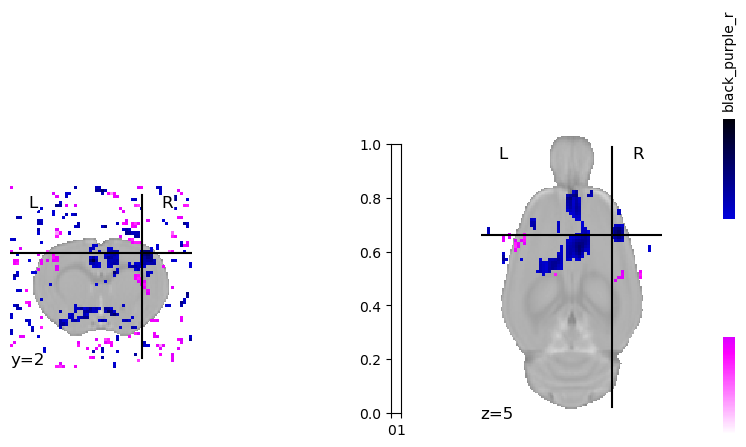

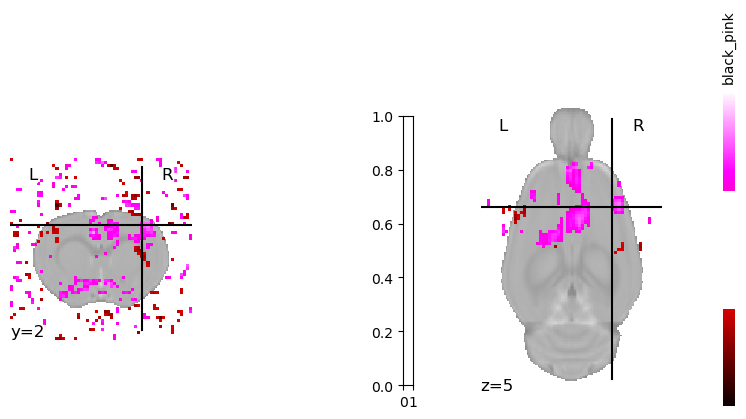

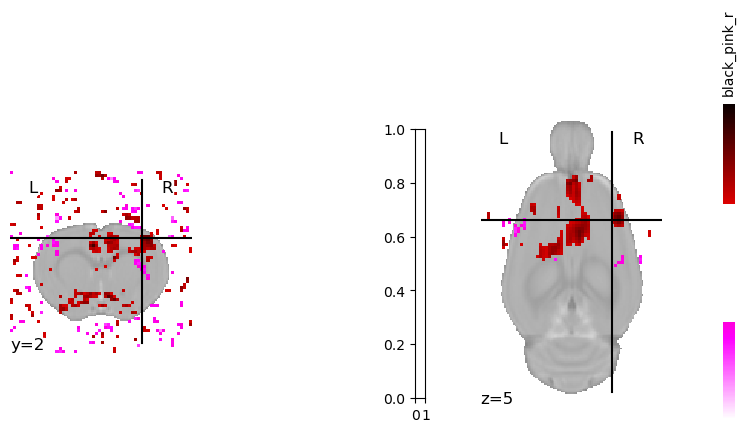

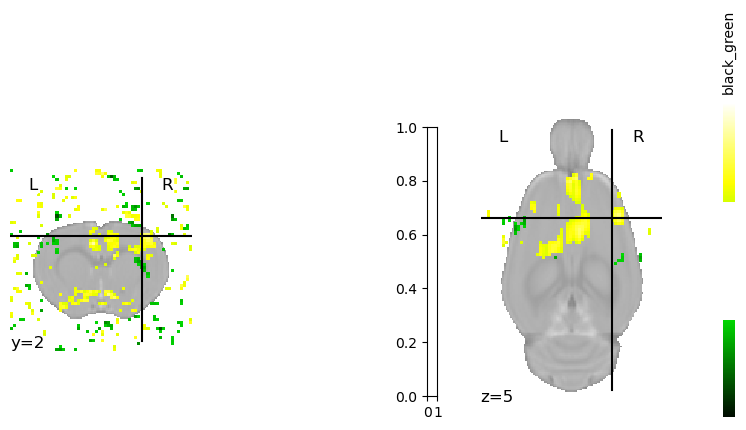

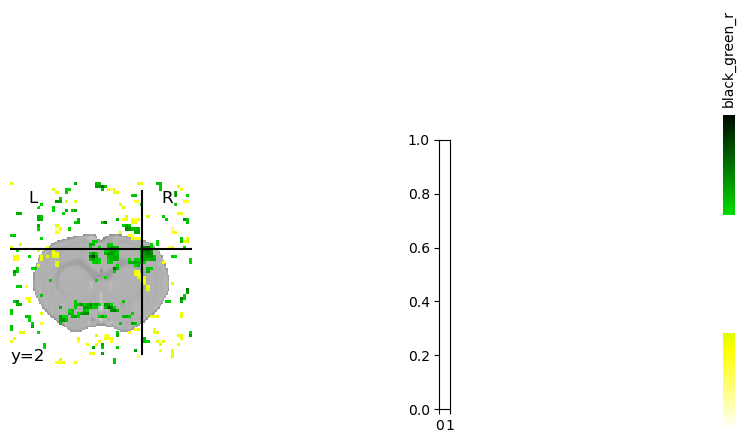

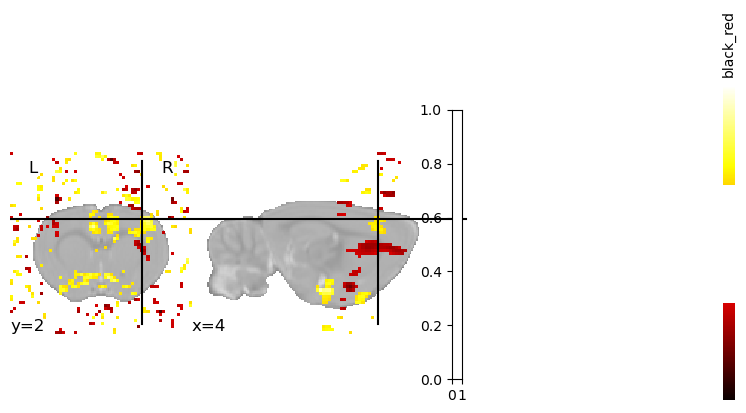

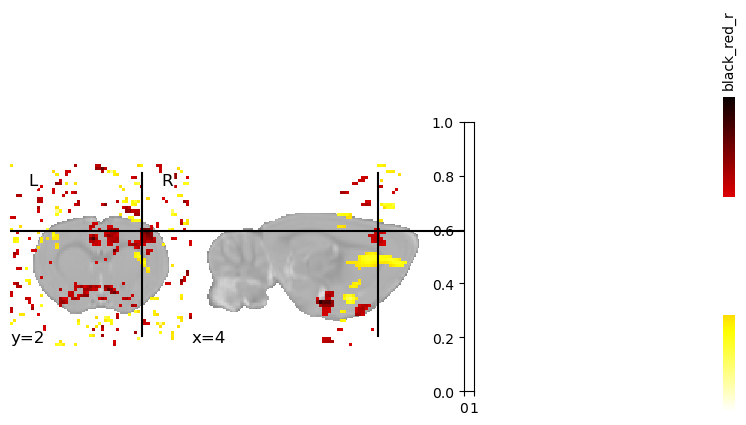

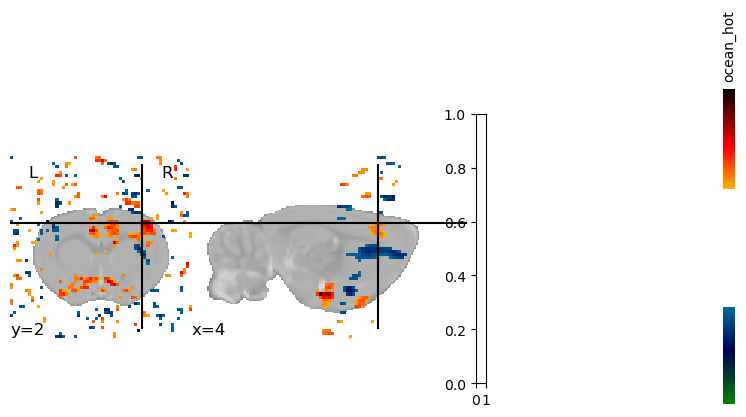

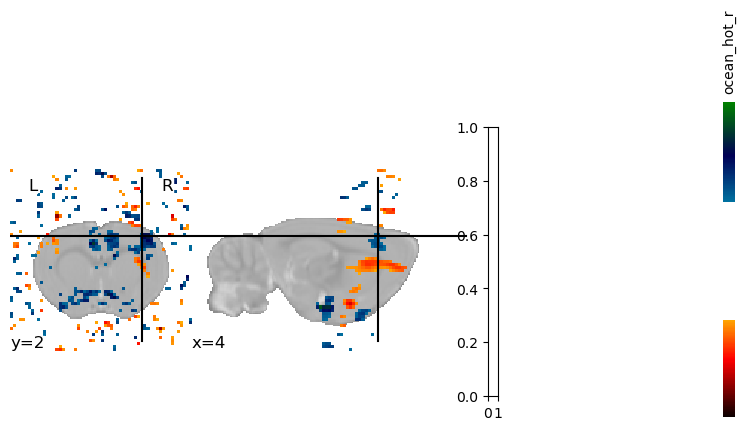

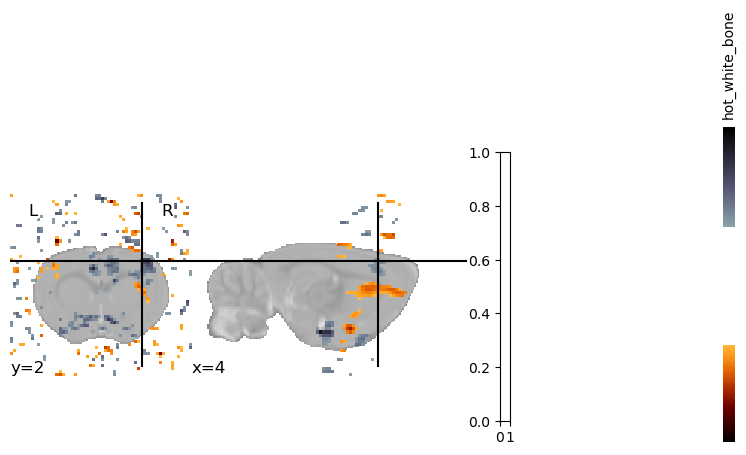

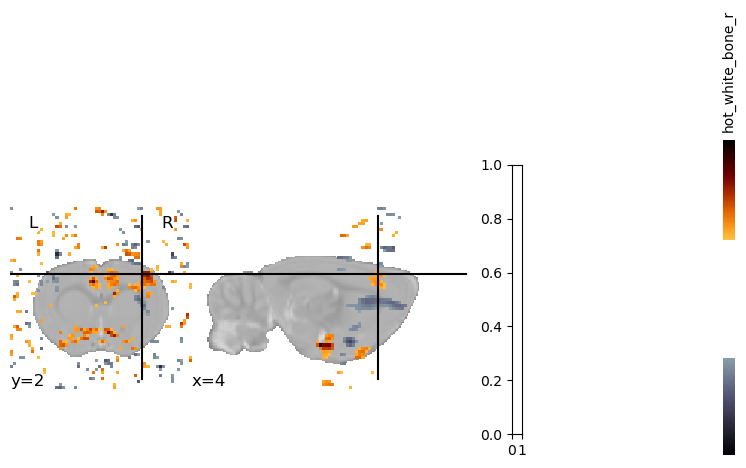

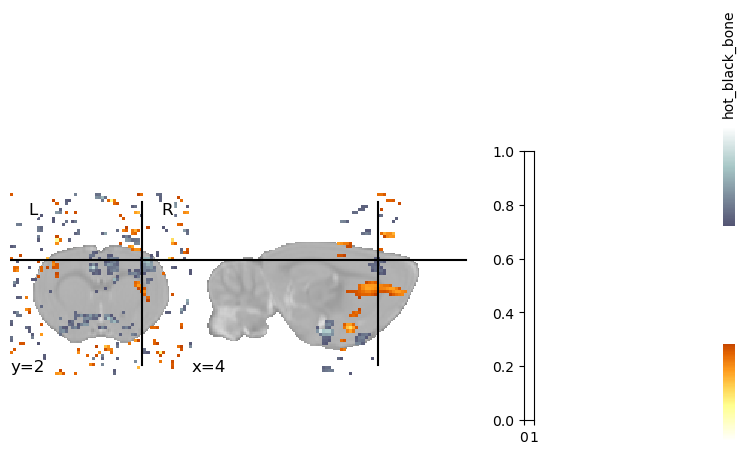

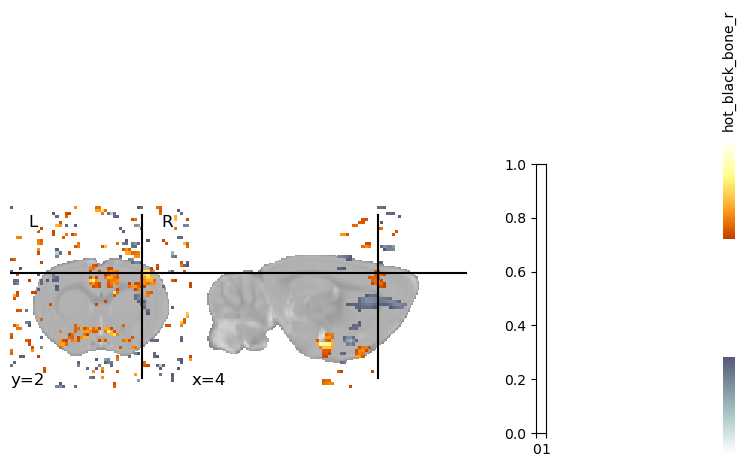

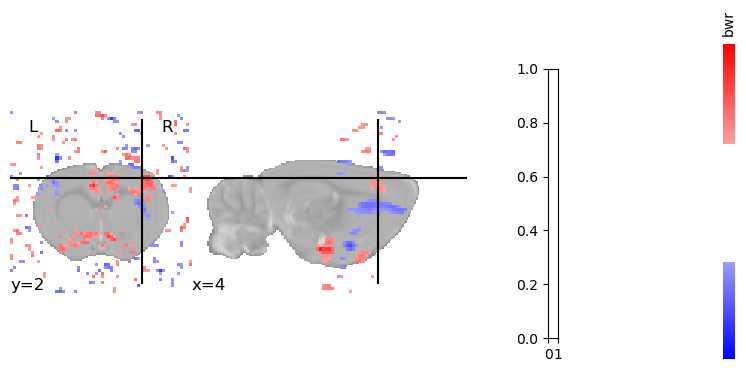

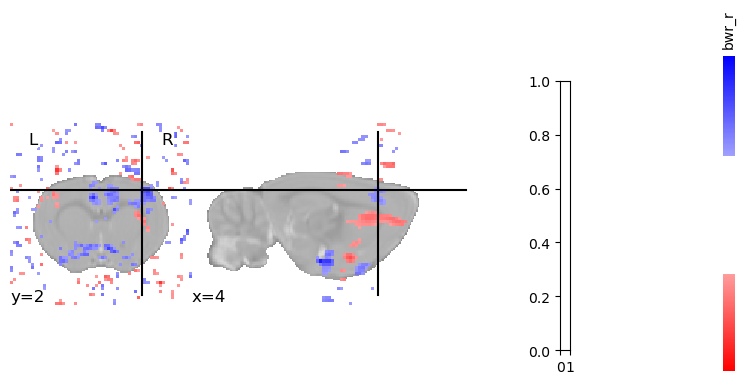

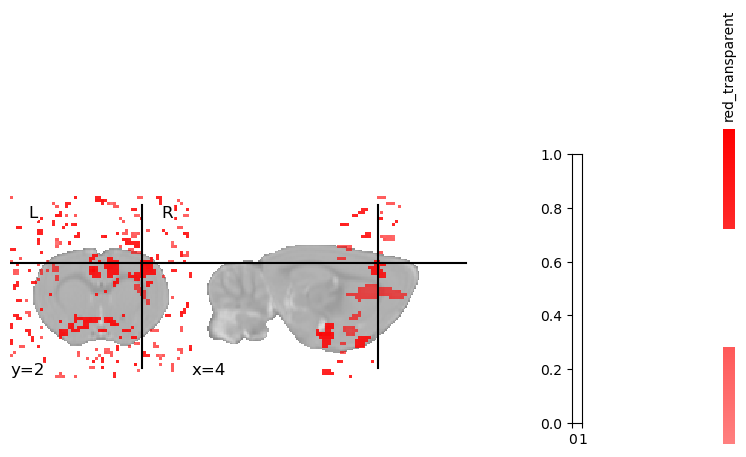

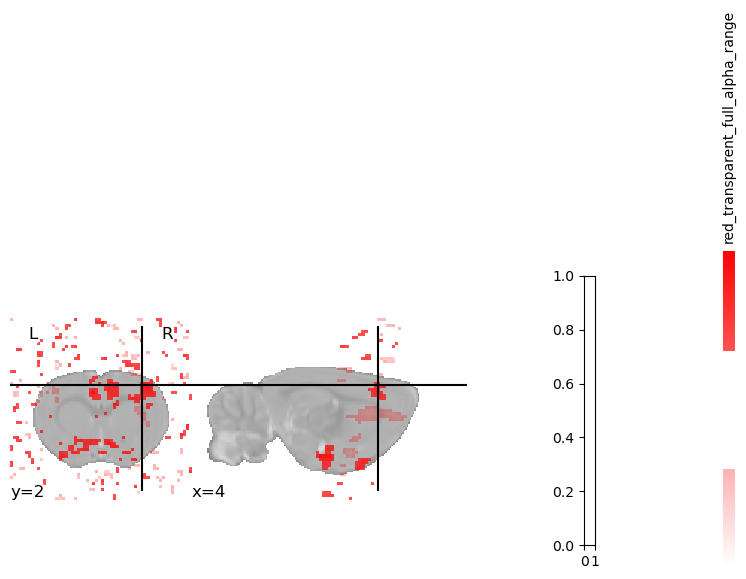

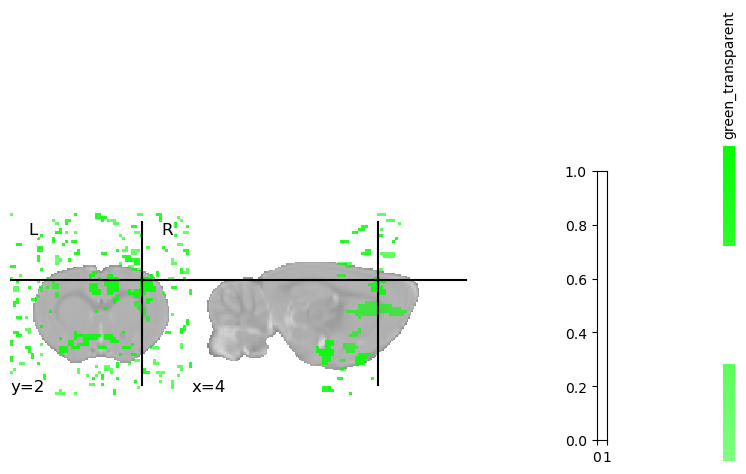

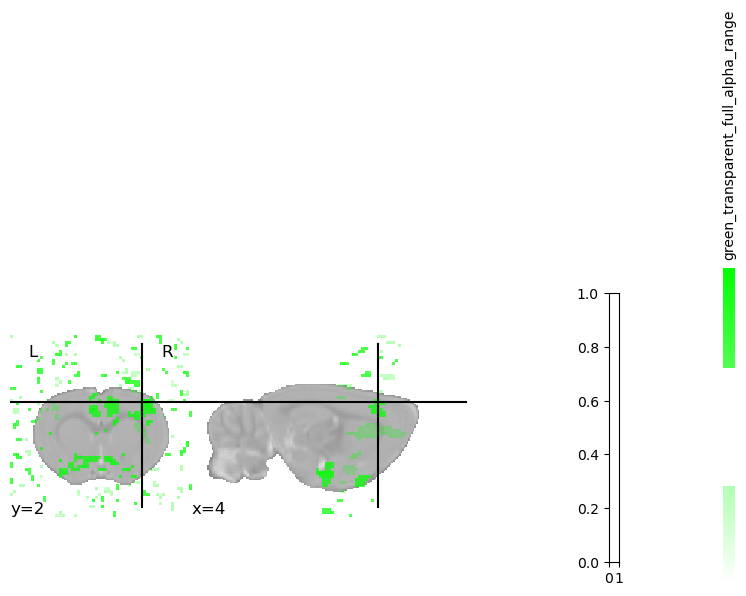

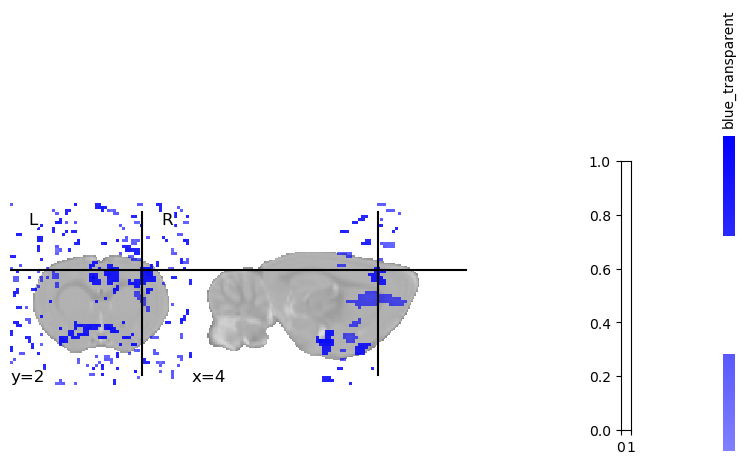

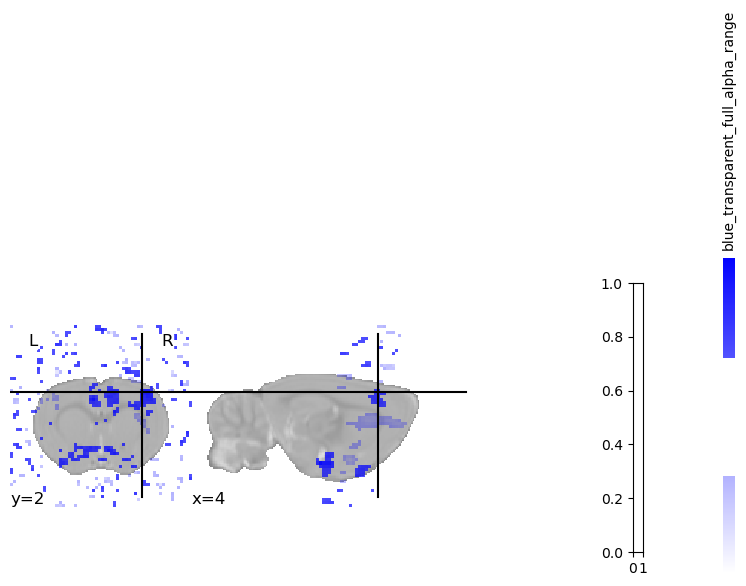

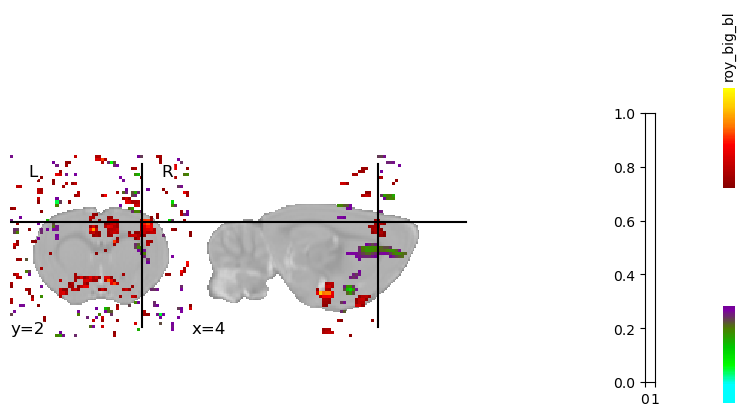

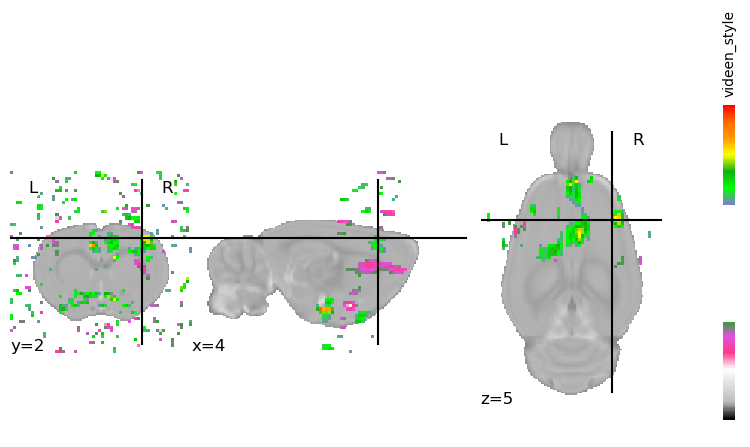

98
201103


KeyboardInterrupt: 

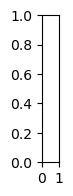

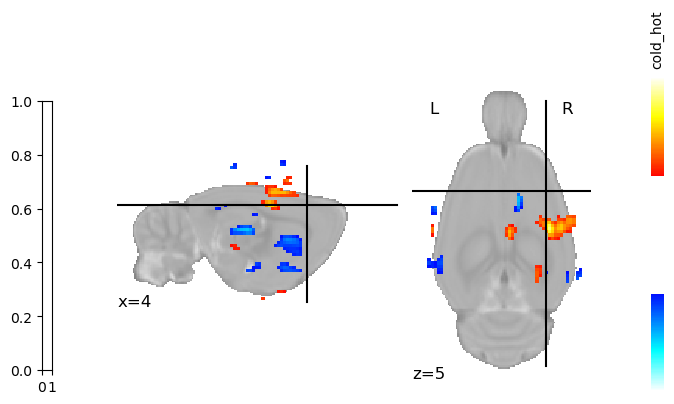

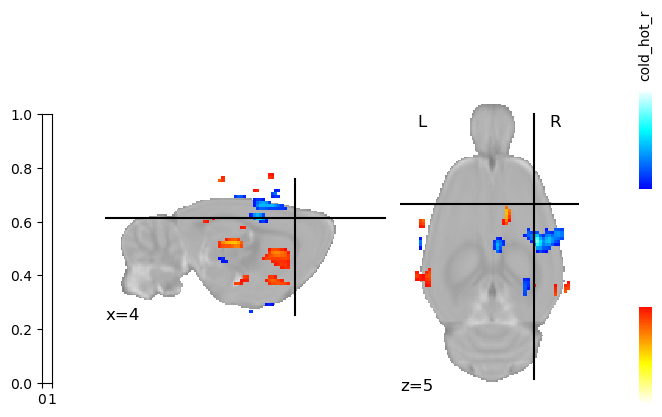

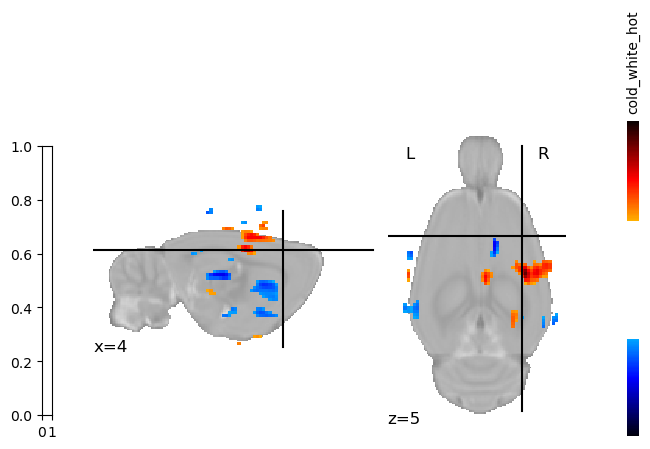

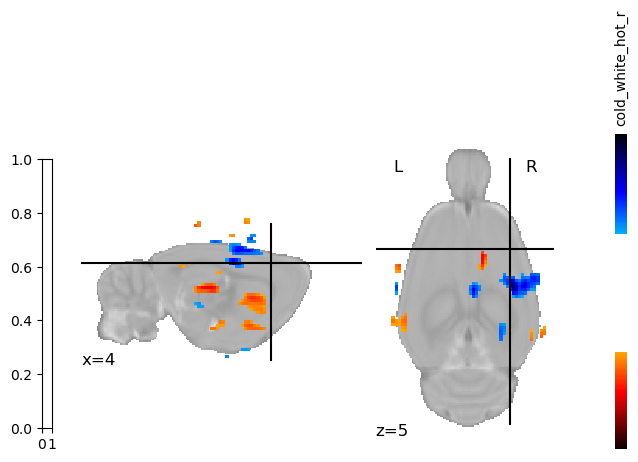

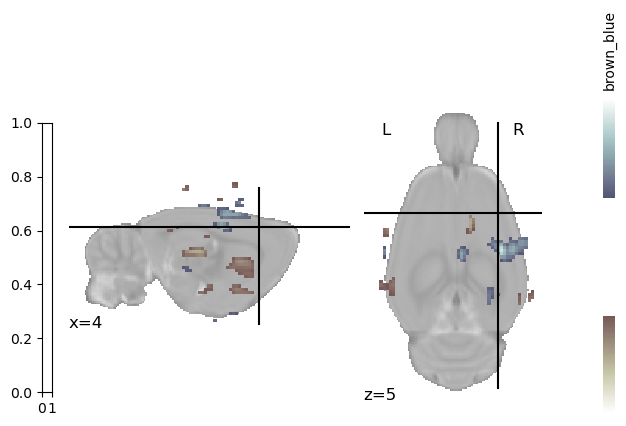

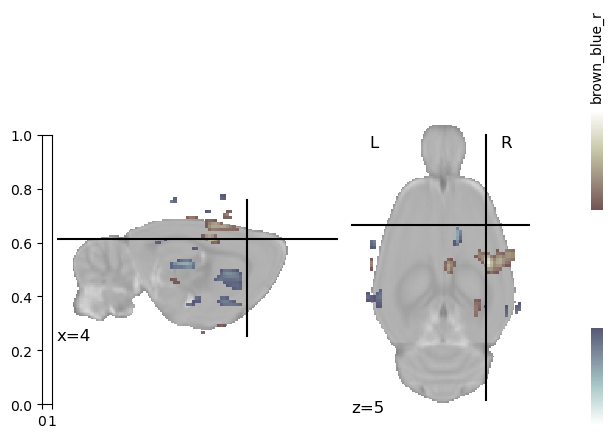

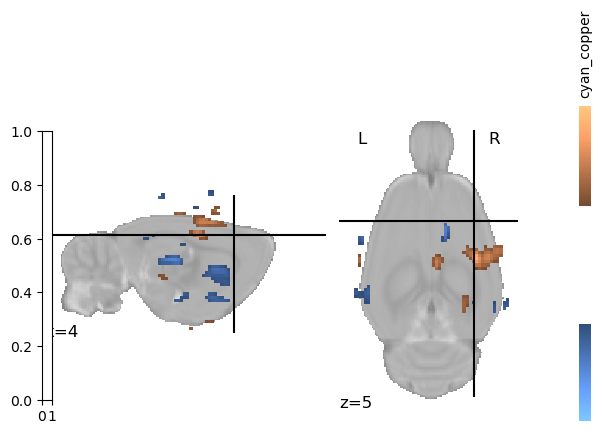

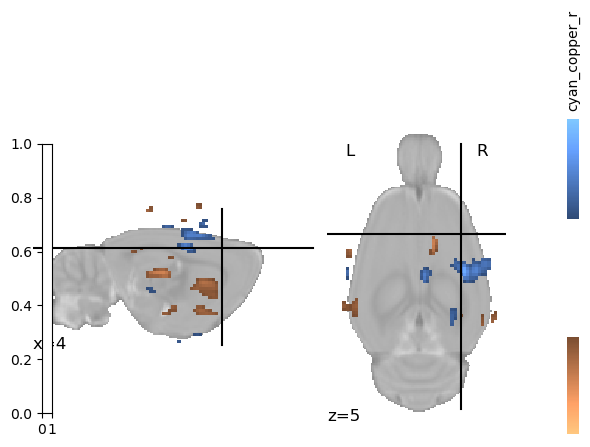

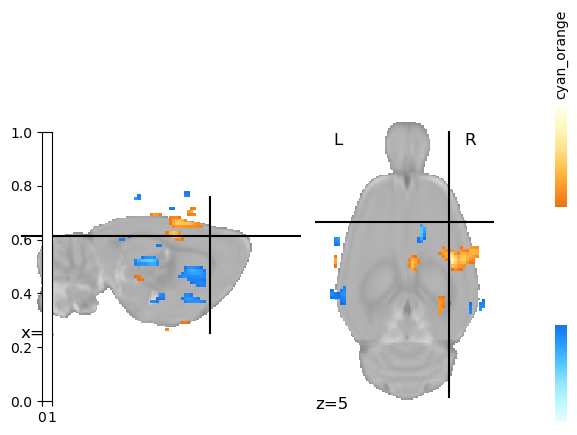

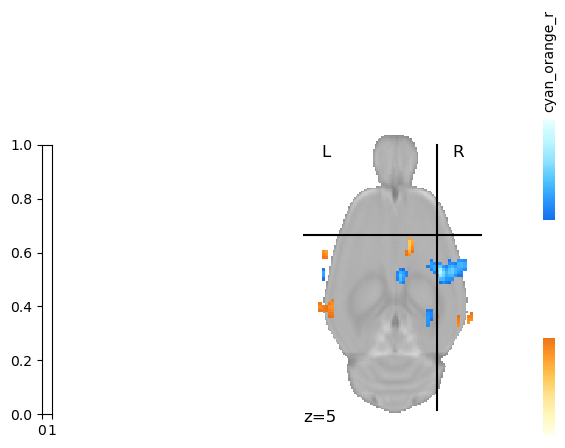

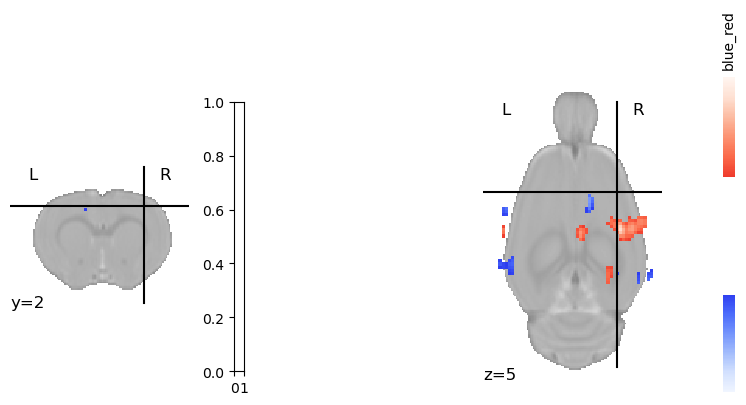

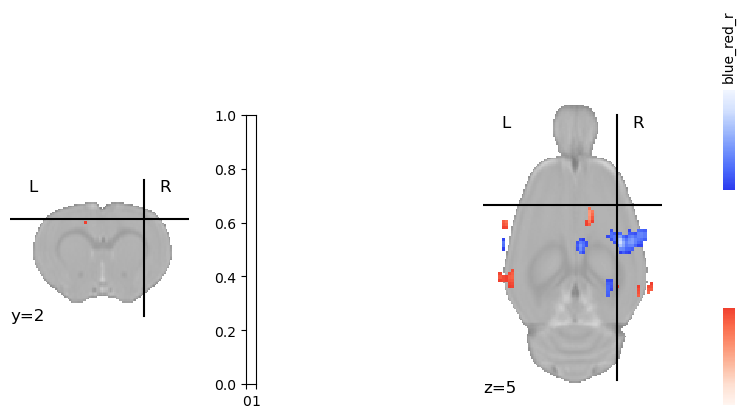

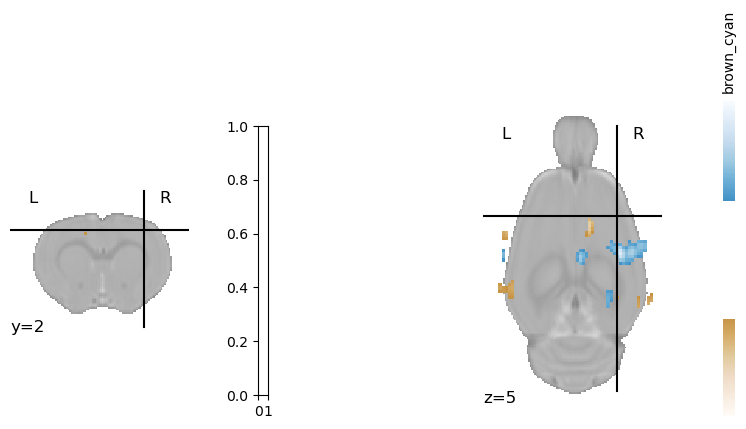

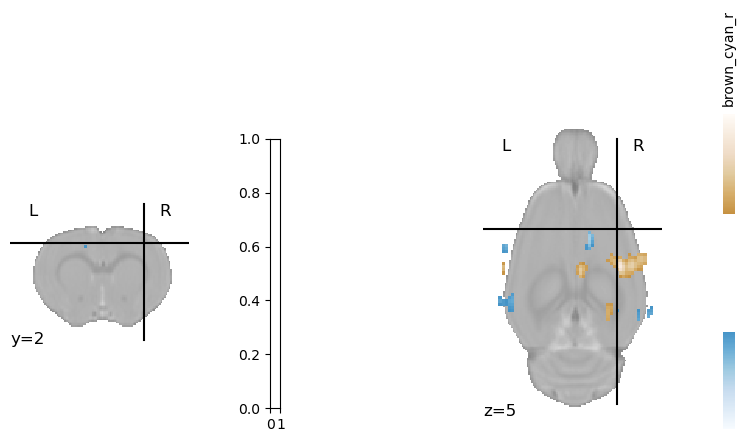

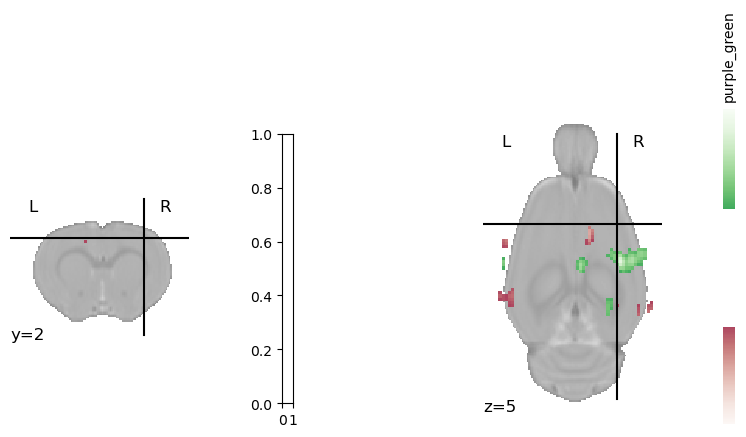

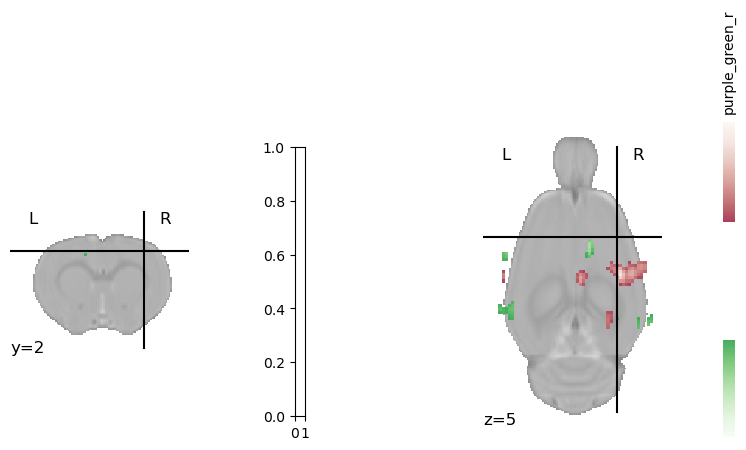

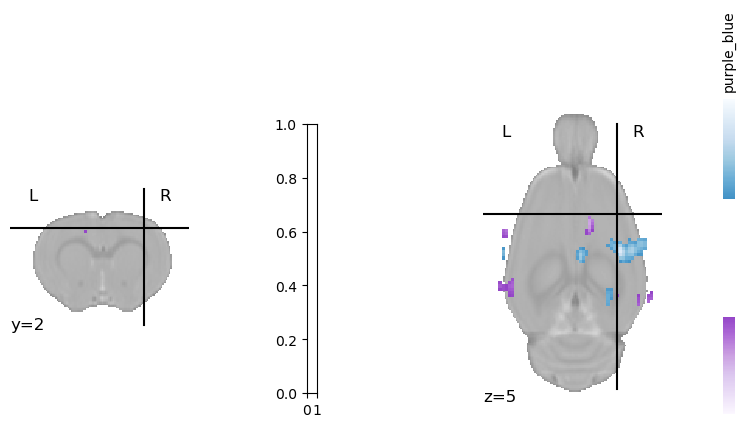

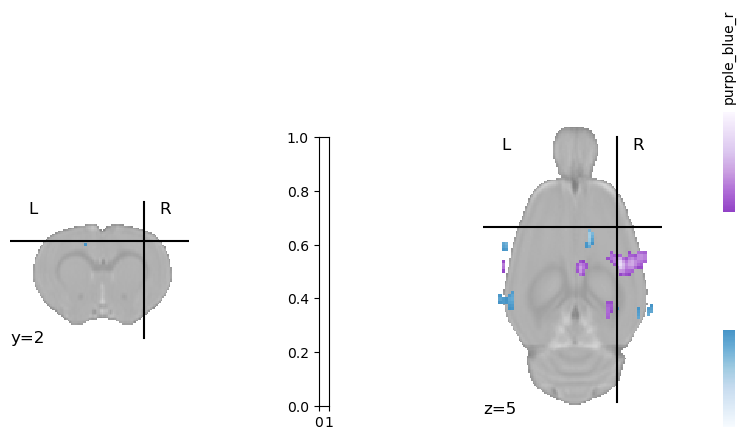

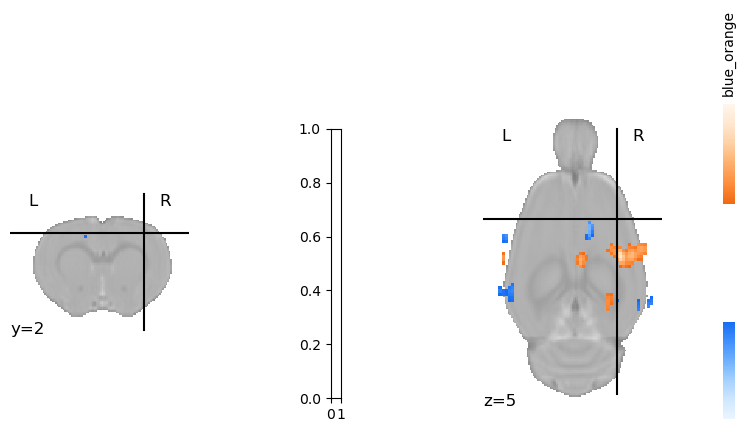

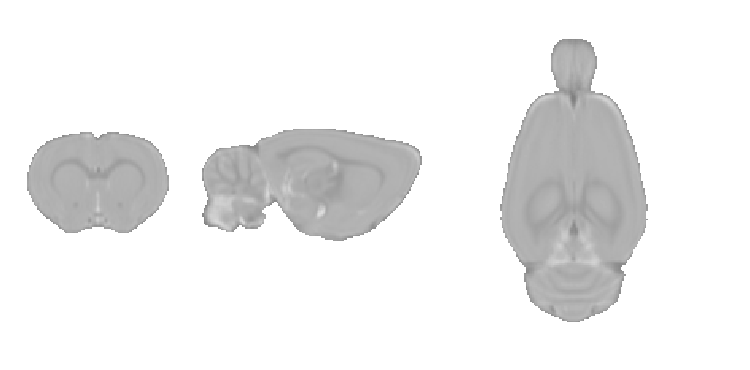

In [7]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise RuntimeError("This script needs the matplotlib library")

import numpy as np
import nibabel as nib
from nilearn import plotting
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

# Load your data and define paths
# Assuming z_scores_path and template_path are defined

# Get the list of available colormaps
nmaps = len(nilearn_cmaps)
colormaps = list(nilearn_cmaps.keys())

# Loop through each brain map
for ID in range(96, 99):
    subj_num = str(df.iloc[ID]['rat.sub'])
    print(ID)
    print(subj_num)

    # Load the z-score image
    z_scores = nib.load(z_scores_path + 'z_score_sub-0{}_ses-1.nii.gz'.format(subj_num))

    # Initialize the figure
    plt.figure(figsize=(10, 4.2))
    plt.subplots_adjust(top=0.4, bottom=0.05, left=0.01, right=0.99)

    # Loop through each colormap
    for index, cmap in enumerate(colormaps):
        plt.subplot(1, nmaps + 1, index + 1)
        
        # Plot the brain map with the current colormap
        plot_stat = plotting.plot_stat_map(z_scores,
                                           bg_img=template,
                                           cut_coords=(4, 2, 5),
                                           threshold=1.9,
                                           display_mode='ortho',
                                           cbar_tick_format='%.2g',
                                           symmetric_cbar=True,
                                           draw_cross=True,
                                           vmax=5,
                                           black_bg=False,
                                           cmap=cmap)
        plt.title(cmap, fontsize=10, va="bottom", rotation=90)
        plt.axis("off")

    plt.show()
